# 期末專題 - 基本目標

### 下載ChromeDriver - WebDriver for Chrome，解壓後並放置於欲呼叫的路徑

In [ ]:
# 下載位置
# http://chromedriver.chromium.org/downloads

### 安裝Selenium

In [ ]:
# !pip install selenium

### 載入需要的套件

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
from datetime import datetime
from matplotlib.font_manager import FontProperties
from time import sleep
from bs4 import BeautifulSoup, Comment
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

### 使用Selenium模擬下拉網頁動作，讓網頁更新，並儲存最新的500筆熱門新聞

### *使用瀏覽刷新方式*

**執行爬蟲**

In [2]:
# 設定Webdriver
options = Options()
options.add_argument("--start-maximized")
url = "https://www.cupoy.com/newsfeed/topstory"
browser = webdriver.Chrome(options=options,
                           executable_path='./Data/chromedriver')

# 初始化變數
time_sleep = 5
total_news = 500
current_height = 0
current_news_height = 0
last_news_height = 0
current_news_title = ''
last_news_title = ''
news = []

# 打開瀏覽器並連到Cupoy的熱門新聞頁
browser.get(url)

# 第一次載入頁面，部分動態更新需等待的時間，有時會超過5秒，才會完全轉換完成
sleep(time_sleep*2)
# 取得載入後的卷軸高度
last_height = browser.execute_script("return document.body.scrollHeight;")

# 取得高度位置
def getHeight(input):
    return int(re.compile('[\d]+').search(input.split()[7]).group(0))    

while True:
    # 爬取熱門新聞區塊
    html = browser.page_source    
    soup = BeautifulSoup(html, 'lxml')
    news_area = soup.find("div",
                          attrs={'class':'ReactVirtualized__Grid__innerScrollContainer'})
    news_list = news_area.find_all("div", attrs={'class':'sc-eEieub sc-iuDHTM ibJqYc'})

# 舊方法
#     # 如果儲存news的list不是空的才會執行
#     # (會在原本已顯示15筆熱門新聞的區域內重複更新，
#     # 但更新筆數不一定，避免文章動態更新後被吃掉)
#     if len(news) > 0:
#         # 找刷新前最後一筆在刷新後熱門新聞所在位置
#         for i, item in enumerate(news_list):
#             # 取目前該筆熱門新聞的項目高度位置
#             current_news_height = getHeight(news_list[i]['style'])

#             # 更新刷新前在刷新後原最後一筆熱門新聞的項目高度位置(for迴圈內只會執行一次)
#             if last_news_title == item.a.get('title'):
#                 last_news_height = getHeight(item['style'])

#             # 把刷新頁面後新增的熱門新聞資料儲存
#             # (更新刷新前熱門新聞的項目高度位置後才會處理)
#             if current_news_height > last_news_height:
#                 if len(news) <= total_news-1:
#                     news.append(str(item))
#                 else:
#                     break

#             # 取刷新頁面後的最後一筆熱門新聞(最後一筆)的資訊
#             if i == len(news_list)-1:
#                 # 更新該次刷新最後一筆熱門新聞的文章標題
#                 last_news_title = item.a.get('title')
#                 # 更新該次刷新最後一筆熱門新聞的項目高度位置
#                 last_news_height = getHeight(item['style'])
                
#     # 只會在進入while迴圈時執行一次
#     else:
#         # 取載入頁面後的第15筆熱門新聞(最後一筆)的項目高度位置
#         last_news_height = getHeight(news_list[len(news_list)-1]['style'])
#         # 取載入頁面後的第15筆熱門新聞(最後一筆)的文章標題
#         last_news_title = news_list[len(news_list)-1].a.get('title')
#         # 把15筆熱門新聞資料儲存
#         news = [str(item) for item in news_list]

#     # 顯示目前的狀態
#     if len(news) >= total_news:
#         print('刷新停止')
#         break
#     else:
#         # 刷新熱門新聞
#         browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         sleep(time_sleep)
#         current_height = browser.execute_script("return document.body.scrollHeight;")
#         print('網頁更新中...')
#         last_height = current_height
#         continue

    # 儲存所有爬下來的熱門新聞數據
    [news.append(str(item)) for item in news_list]
    
    # 轉成無序，利用無序方式，把重複的刪除後組回有序，並依原index重新排序
    news = sorted(set(news), key=news.index)        

    if len(news) >= total_news:
        news = news[:total_news]
        print('刷新停止')
        break

    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(time_sleep)
    print('網頁更新中...')

# 關閉瀏覽器
browser.quit();

網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
網頁更新中...
刷新停止


**觀看儲存的熱門新聞文章標題(共500筆)**

In [3]:
for i, item in enumerate(news):
    soup_news = BeautifulSoup(item, 'lxml')
    news_title = soup_news.find('a',
                                attrs={'class':'sc-RbTVP sc-kEmuub eSJXii'}).get('title')
    print(i + 1, news_title)

1 同事工作上的失誤，該如何寫EMAIL溝通？ - 大人學
2 部分可玩的暴雪棄作《星海爭霸：暗影獵殺》在網上流出
3 【打死我也發不出口罩】3000 萬日供應量 vs. 28 億的日需求！中國口罩廠員工「日做 16 小時，壓力大到哭」 | BuzzOrange
4 下一版本 Chrome 將能與現實世界有更多的互動
5 【蝗災範圍擴大至亞洲】逼 70 萬印度軍隊撤軍！一天可飛 150 公里，壽命達百日的蝗蟲「腰斬印度 50% 糧產」 | BuzzOrange
6 「習近平會鎖國搞文革，還是變階下囚？」—— 2 因素讓中國黨刊曝「習 1 月初就知武漢肺炎疫情」 | BuzzOrange
7 當隊友在你眼前飛墜，你會去救他嗎？──8000 公尺的人性考驗 ｜ 換日線全球讀書會 ｜ 換日線 Crossing
8 NASA 給四個新太空任務提案各 300 萬美元來完善計畫
9 身為上班族，你一天辦公多久？澳洲研究：「久坐一小時，縮減22分鐘的壽命」 | SmartM 新網路科技
10 一張世界經濟地圖，看出臺灣人有活力又會拚經濟 | BuzzOrange
11 Samsung Galaxy Z Flip 的超薄可摺式玻璃並不那麼耐用
12 「社區傳播」4 徵兆，臺灣有 3 項都不符合 ── 大仁哥深夜 PO 文強調：從社區得到感染的風險很低 | BuzzOrange
13 Tesla 德國 Gigafactory 的早期工作被叫停了
14 【你多益考幾分】臺灣多益爛到亞洲倒數是「國安危機」？學者用日本舉例打臉這說法 | BuzzOrange
15 【臺北還比南極冷】南極企鵝數量狂減 50 %！南極氣溫首次突破 20 度，科學家示警「海平面上升加速」 | BuzzOrange
16 併購不受武漢肺炎疫情打亂，貿聯-KY佈局東南亞砸14億元併新加坡商Speedy｜數位時代
17 因應武漢肺炎，臉書取消全球行銷高峯會 | iThome
18 微軟新創加速器供新創團隊免費使用GitHub Enterprise | iThome
19 從病毒到免疫， “科學地”揭開新冠病毒的神祕面紗 | 機器之心
20 OpenKG發佈多個新冠病毒相關開放知識圖譜（附鏈接） | 機器之心
21 語音識別新範式：完全的“端到端”模型，優勢在哪裏？ | 機器之心
22 六大場景，看懂聲紋識別技術怎樣“

204 能裝、好用還相當貌美：LOEWE 2020春夏全新 Balloon 水桶包，圓弧外型有夠討喜 - The Femin
205 這樣穿成180！5招小隻男「轉大人」穿搭鐵則 - Page 1 | manfashion這樣變型男
206 外型像魟魚！空中巴士秀「翼身一體」概念機，飛行體驗有什麼變化？ | DQ 地球圖輯隊 帶你看透全世界
207 唐綺陽星座運勢／巨蟹一特質吸桃花　1星座本週有正財運 | 淘好運 | Babyou 姊妹淘
208 【健康饗食特企】文青風格選物超市 融入臺灣味溫馨食堂 ─ 神農生活×食習-SENSE-欣傳媒生活頻道
209 【京都美食】京都巷內美食 西陣平民食堂「拉麵 極」 | MATCHA - 日本線上旅遊觀光雜誌
210 買車好還是租車好？他住5千萬豪宅，10幾年不買車：買車就像養獅子，口袋不深小心被吃掉-財富線上-消費-商周財富網
211 心理學看電影／「翻過這頁，也許我們會有嶄新的結局。」──《曼哈頓戀習曲》 | 淘心話 | Babyou 姊妹淘
212 東京一百選｜niusnews妞新聞
213 開心採草莓又能採玉米,場地乾淨,推車也ＯＫ | 媽咪拜MamiBuy
214 一直清喉嚨，一直眨眼睛，是過敏？氣喘？還是妥瑞？兒科醫師教你辨分明 - BabyHome 新知大耳朵
215 PGO TIGRA 200車主公認的四大優點&缺點｜車主怎麼說 – 癮車報
216 【投書】到底什麼時候該戴口罩？社會大眾需要更清晰說理的風險溝通 ｜ 郭憲文 ／ 多元發聲．讀者投書 ｜ 獨立評論
217 男生都喜歡溫柔的女生嗎？ | 淘心話 | Babyou 姊妹淘
218 臺南｜散步臺南巷弄，10個好味好玩更好拍的景點一次告訴你 - 輕旅行
219 正確護齒口腔保健知多少？3種NG傷牙行為，別再犯了 - BabyHome 新知大耳朵
220 每日星座運勢2020/2/17 本日霸氣星魔羯座 | 淘好運 | Babyou 姊妹淘
221 把第一桶金當兒子，30年經驗投資人：養他8年，他就養你一輩子-財經好讀-臺股-商周財富網
222 2020 KAWASAKI Z900 臺灣發表，售價488,000元：全新電控導入！Ninja 400新車色同步亮相 – 癮車報
223 美國從“鑽石公主號”郵輪撤僑 - 紐約時報中文網
224 餘傑：習近平夢斷武漢

460 本土感染死亡首例，竟然是出自流感通報名單？陳時中揭追查113人幕後關鍵｜商周
461 藍色刺蝟飆出新高度！《音速小子》上映三日創下遊戲改編電影史上新紀錄！ :: 遊戲基地 gamebase
462 洛杉磯美食新亮點！米其林三星主廚掌舵 Gucci比佛利山再開餐酒館 | BeautiMode 創意生活風格網
463 如何讓孩子透過一張圖自動自發勤洗手？ - 天才領袖
464 連續7天醫護人員免費喝！高人氣手搖飲「喫茶小舖」招待醫護人員免費喝飲料，不限品項讓醫護人員補充體力。 ┃TaipeiWalker．JapanWalker．WalkerLand
465 【編輯檯報告】大膽創新就對了！ - EE Times Taiwan 電子工程專輯網
466 香港腳症狀除了搔癢還有起水泡！香港腳該擦藥膏嗎？完整解答治療方法 |早安健康
467 霸氣中又帶軟萌氣質！《梨泰院Class》反社會女主角金多美，5點帶你深度認識她！｜PopDaily 發現你的生活靈感
468 嬰幼兒期多抱抱，成年後幸福感愈高/學前兒/託嬰託育/2017-11-22/即時/親子天下網站
469 2/17限時免費App特輯：迷幻個性風照片App《Vaporwave》限免 | 限免、免費、特價、iPhone、App | 手機小姐 | 妞新聞 niusnews
470 PS4棒球遊戲《MLB The Show 20》於3月17日正式發售！特典內容公開 :: 遊戲基地 gamebase
471 臺灣團隊3D動作冒險《Forward To The Sky 前進，天空塔！》Switch加強版推出決定 :: 遊戲基地 gamebase
472 《音速小子》日配版最新預告揭露聲優陣容 Steam系列作25折優惠開賣！ :: 遊戲基地 gamebase
473 《State of Decay 腐朽之都2》最新內容完整收錄同梱威力加強版3月13日發售決定 :: 遊戲基地 gamebase
474 《虹彩六號：圍攻行動》全新一季「虛空行動」改版情資、第五年和第六年改版更新計畫揭露 :: 遊戲基地 gamebase
475 《仁王 2》「姊川之戰」電玩展版實機體驗曝光 孤獨討鬼征途還有貓妖相伴 :: 遊戲基地 gamebase
476 紅色狐狸與極光守護精靈再度踏上旅程！《Spirit of the North 北方之魂》P

### *使用API方式(後續處理採此方式)*
#### (API似乎有BUG，發現有重複的文章標題，且同個來源)

**執行爬蟲**

In [7]:
# 設定Webdriver
options = Options()
options.add_argument("--start-maximized")
browser = webdriver.Chrome(options=options,
                           executable_path='./Data/chromedriver')

html_list = []

# 發現有重複的資料，多爬一些做篩選
for ids in range(0, 600, 100):
    # API每次最多只能取100筆，所以len=100，那就取6次
    browser.get('https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNews&nationid=TW&startNewsID=' + str(ids) +'&len=100')
    # 第一次載入頁面，部分動態更新需等待的時間，有時會超過5秒，才會完全轉換完成
    sleep(time_sleep)
    
    html_list.append(browser.page_source)

# 關閉瀏覽器
browser.quit();

**觀看JSON資料**

In [8]:
print(json.dumps(json.loads(BeautifulSoup(html_list[0], 'lxml').pre.text),
                 indent=4, sort_keys=False, ensure_ascii=False))

{
    "items": [
        {
            "itemuid": "68747470733A2F2F7777772E646172656E636164656D792E636F6D2F61727469636C652F766965772F69642F3136363635",
            "newsid": "00000170383738A068747470733A2F2F7777772E646172656E636164656D792E636F6D2F61727469636C652F766965772F69642F3136363635",
            "itemsrctype": 2,
            "ctype": 5,
            "title": "同事工作上的失誤，該如何寫EMAIL溝通？ - 大人學",
            "description": "工作上如果有同事不斷犯同樣的錯，不但影響到你的工作效益，還害你被主管責備，你會怎麼跟那個犯錯的人溝通呢？在我的「商務Em...",
            "thumbimgurl": "https://www.darencademy.com/images/backend/article/4929d837c66b262e7817f05b66cf025e.jpg",
            "linkurl": "https://www.darencademy.com/article/view/id/16665",
            "nationID": "TW",
            "publishtime": 1581491108000,
            "bucketids": [
                "career_tw"
            ],
            "bucketgrpids": [
                "WhiteCollar_tw",
                "business_tw"
            ],
            "metrics": {
                "socialScorer": {
    

**資料分析/整理**

In [10]:
total_news = 500
titles = []
news = {}

for ids, html in enumerate(html_list):
    soup = BeautifulSoup(html, 'lxml').pre.text
    
    categories = {}
#     sub_categories = {}
    
    groupMap = json.loads(soup)['groupMap']
    bucketMap = json.loads(soup)['bucketMap']
    items = json.loads(soup)['items']

    for i, item in enumerate(groupMap):
        categories.setdefault(groupMap[item]['groupid'],
                              groupMap[item]['name'])
        
#     for i, item in enumerate(bucketMap):
#         sub_categories.setdefault(bucketMap[item]['bucketid'],
#                                   bucketMap[item]['name'])
        
    for i, item in enumerate(items):
        # 處理分類
        if not items[i].get('bucketgrpids'):
            # items[i].setdefault('bucketids', [''])
            bucketgrpids = '無'
        else:
            if len(items[i]['bucketgrpids']) > 1:
                bucketgrp = []
                for ele in items[i]['bucketgrpids']:
                    bucketgrp.append(categories[ele])
                bucketgrpids = ', '.join(bucketgrp)
            else:
                bucketgrpids = categories[items[i]['bucketgrpids'][0]]
                
#         # 處理子主題(有新項目但bucketMap沒撈到對應的資料，先略過)
#         if not items[i].get('bucketids'):
#             # items[i].setdefault('bucketgrpids', [''])
#             bucketids = '無'
#         else:
#             if len(items[i]['bucketgrpids']) > 1:
#                 bucket = []
#                 for ele in items[i]['bucketids']:
#                     bucket.append(sub_categories[ele])
#                 bucketids = ', '.join(bucket)
#             else:
#                 bucketids = sub_categories[items[i]['bucketids'][0]]
    
        if not items[i].get('description'):
            description = '無'
        else:
            description = items[i]['description']
        
        # 標題不重複才加入
        if not items[i]['title'] in titles:
            titles.append(items[i]['title'])
        
            j = len(titles)
            news.setdefault(j)
            news[j] = list([bucketgrpids,
#                             bucketids,
                            items[i]['title'],
                            description,
                            items[i]['linkurl'],
                            datetime.fromtimestamp(items[i]['publishtime'] / 1000
                                                  ).strftime('%Y-%m-%d %H:%M:%S'),
                            items[i]['metrics']['keywordtrend'],
                            items[i]['metrics']['uidactscore'],
                            items[i]['metrics']['socialactscore']])
        
        if len(titles) >= total_news:
            break

# columns = ['分類', '子主題', '標題', '部分內文']
columns = ['分類', '標題', '部分內文']

df = pd.DataFrame.from_dict(news).T.reset_index().drop('index', axis = 1)
df2 = df.iloc[:, :3]
df2.columns = columns
df2

,分類,標題,部分內文
0,"職場白領, 商業",同事工作上的失誤，該如何寫EMAIL溝通？ - 大人學,工作上如果有同事不斷犯同樣的錯，不但影響到你的工作效益，還害你被主管責備，你會怎麼跟那個犯錯...
1,"御宅學園, 遊戲",部分可玩的暴雪棄作《星海爭霸：暗影獵殺》在網上流出,對暴雪來說，《星海爭霸：暗影獵殺》（StarCraft: Ghost）這款作品可能是一段不願...
2,"職場白領, 商業",【打死我也發不出口罩】3000 萬日供應量 vs. 28 億的日需求！中國口罩廠員工「日做 ...,【我們為什麼要挑選這篇文章】 武漢肺炎肺炎肆虐中國，工廠若想復工，每位員工都必須戴上口罩。且...
3,科技,下一版本 Chrome 將能與現實世界有更多的互動,Google 快將讓網頁瀏覽器變成更先進技術與使用者互動的門戶，因為他們在測試的 Chrom...
4,無,【蝗災範圍擴大至亞洲】逼 70 萬印度軍隊撤軍！一天可飛 150 公里，壽命達百日的蝗蟲「腰...,【我們為什麼要挑選這篇文章】 東非發生 25 年來最嚴重「蝗災」，聯合國農糧組織（FAO）1...
...,...,...,...
495,"御宅學園, 遊戲, 運動",PS4棒球遊戲《MLB The Show 20》於3月17日正式發售！特典內容公開 :: 遊...,Sony Interactive Entertainment Taiwan Limited（...
496,"御宅學園, 遊戲",臺灣團隊3D動作冒險《Forward To The Sky 前進，天空塔！》Switch加強...,臺灣獨立遊戲開發團隊 AnimuGame 愛莉姆遊戲 所製作，自 2015 年在 PC St...
497,"御宅學園, 遊戲",《音速小子》日配版最新預告揭露聲優陣容 Steam系列作25折優惠開賣！ :: 遊戲基地 g...,派拉蒙影業於 2 月 14 日在全美公開，預定在 2020 年 2 月 21 日正式在臺灣上...
498,"御宅學園, 遊戲",《State of Decay 腐朽之都2》最新內容完整收錄同梱威力加強版3月13日發售決定...,美國 Undead Labs 宣佈，甫於 2019 年 11 月在 PC Steam 平臺上...


**計算所有分類數量**

In [11]:
# 重組分類
category_list = ', '.join(df2['分類'].values.tolist()).split(', ')
# 計算
df3 = pd.Series([category for category in category_list]
               ).value_counts().sort_index().rename_axis('分類').reset_index(name='次數')
df3

,分類,次數
0,3C達人,45
1,享樂女性,101
2,健身瘦身,34
3,商業,79
4,國際財經,34
5,城市食旅,32
6,御宅學園,38
7,文青聚落,27
8,無,152
9,生活,118


**計算所有分類數量(佔比)**

In [12]:
df3 = pd.Series([category for category in category_list]
               ).value_counts(normalize=True
                             ).sort_index().rename_axis('分類').reset_index(name='佔比')
df3 = df3.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df3

,分類,佔比
0,無,0.164147
1,生活,0.127430
2,享樂女性,0.109071
3,科技,0.088553
4,商業,0.085313
5,親子家庭,0.084233
6,3C達人,0.048596
7,職場白領,0.046436
8,御宅學園,0.041037
9,運動,0.037797


**合併低於3%的分類**

In [16]:
df4 = df3[df3['佔比'] * 100 > 3].append({'分類':'其他',
                                       '佔比':df3[df3['佔比']*100 <= 3]['佔比'].values.sum()},
                                      ignore_index=True)
df4 = df4.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df4

,分類,佔比
0,無,0.164147
1,生活,0.127430
2,享樂女性,0.109071
3,科技,0.088553
4,商業,0.085313
5,親子家庭,0.084233
6,其他,0.059395
7,3C達人,0.048596
8,職場白領,0.046436
9,御宅學園,0.041037


**低於3%的分類 - 其他，重新計算佔比**

In [17]:
df5 = df3[df3['佔比'] * 100 <= 3]
df5.loc[:, ('佔比')] = df5['佔比'].apply(lambda x: x / df5['佔比'].values.sum())
df5 = df5.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df5

,分類,佔比
0,文青聚落,0.490909
1,遊戲,0.363636
2,設計,0.145455


**畫環圈圖**

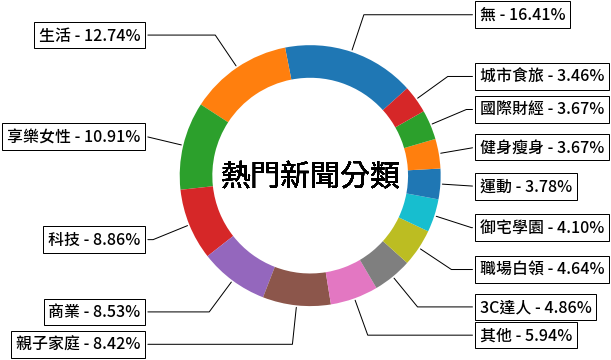

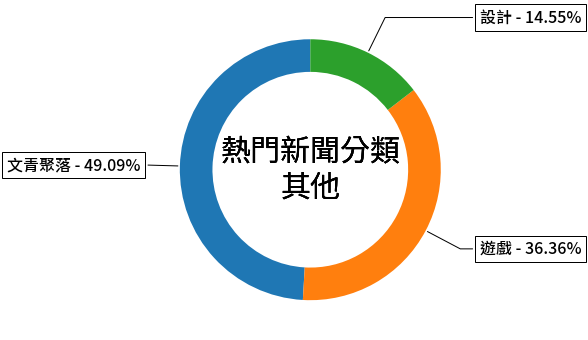

In [177]:
font1 = FontProperties(fname='Data/SourceHanSansTW-Regular.otf')
font2 = FontProperties(fname='Data/SourceHanSansTW-Medium.otf')

# 畫熱門新聞分類佔比高於0.2的環圈圖
# 將圖分為圖案與軸
fig, ax = plt.subplots(figsize=(6, 6), # 圖形大小(寬, 高)
                       subplot_kw=dict(aspect="equal")) # x和y軸比例相同

# 回傳餅圖資訊與文本標籤
wedges, texts = ax.pie(df4['佔比'], # 數據來源
                       wedgeprops=dict(width=0.25), # 餅形圖環的寬圖，環圈圖
                       startangle=42 # 起點，從x軸逆時針旋轉角度
                      )

bbox_props = dict(boxstyle="square, pad=0.3", # 框的樣式與框內填充大小
                  fc="w", # 主體顏色
                  ec="k", # 邊寬顏色
                  lw=1 # 線寬
                 )

kw = dict(arrowprops=dict(arrowstyle="-"), # 箭頭的樣式
          bbox=bbox_props, #文字註釋樣式
          zorder=0, # 多圖層疊加順序
          va="center" #垂直對齊方式
         )

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.text(0, 0, '熱門新聞分類', ha='center',
            fontproperties=font1, size=30, va='center')
    ax.annotate(df4['分類'][i] + ' - ' + str('{:.2%}'.format(df4['佔比'][i])),
                xy=(x, y),
                xytext=(1.3 * np.sign(x), 1.3 * y),
                horizontalalignment=horizontalalignment,
                fontproperties=font2,
                size=16,
                **kw)
# ax.set_title("熱門新聞分類", fontproperties=font1)
plt.show()

# 畫熱門新聞分類佔比低於0.2的被分類至其他，其細項佔比環圈圖
# 將圖分為圖案與軸
fig, ax = plt.subplots(figsize=(6, 6), # 圖形大小(寬, 高)
                       subplot_kw=dict(aspect="equal")) # x和y軸比例相同

# 回傳餅圖資訊與文本標籤
wedges, texts = ax.pie(df5['佔比'], # 數據來源
                       wedgeprops=dict(width=0.25), # 餅形圖環的寬圖，環圈圖
                       startangle=90 # 起點，從x軸逆時針旋轉角度
                      )

bbox_props = dict(boxstyle="square, pad=0.3", # 框的樣式與框內填充大小
                  fc="w", # 主體顏色
                  ec="k", # 邊寬顏色
                  lw=1 # 線寬
                 )

kw = dict(arrowprops=dict(arrowstyle="-"), # 箭頭的樣式
          bbox=bbox_props, #文字註釋樣式
          zorder=0, # 多圖層疊加順序
          va="center" #垂直對齊方式
         )

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.text(0, 0, '熱門新聞分類\n其他', ha='center',
            fontproperties=font1, size=30, va='center')
    ax.annotate(df5['分類'][i] + ' - ' + str('{:.2%}'.format(df5['佔比'][i])),
                xy=(x, y),
                xytext=(1.3 * np.sign(x), 1.3 * y),
                horizontalalignment=horizontalalignment,
                fontproperties=font2,
                size=16,
                **kw)
# ax.set_title("熱門新聞分類", fontproperties=font1)
plt.show()

**計算所有子主題數量**

In [24]:
# # 重組子主題
# sub_category_list = ', '.join(df2['子主題'].values.tolist()).split(', ')
# # 計算
# df6 = pd.Series([sub_category for sub_category in sub_category_list]
#                ).value_counts().sort_index().rename_axis('子主題').reset_index(name='次數')
# df6

**巢狀圓形圖(包含子主題)**

# 期末專題 - 進階目標

### 安裝中研院中文詞知識庫小組

In [ ]:
# !pip install -U ckiptagger

### 載入需要的套件

In [54]:
from ckiptagger import WS, POS, NER
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

### 將文章拆解

**載入模組**

In [26]:
ws = WS("./data/data")
pos = POS("./data/data")
ner = NER("./data/data")


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



**準備斷詞 - 標題**

In [67]:
sentence_list = df2['標題'].values.tolist()
sentence_list

['同事工作上的失誤，該如何寫EMAIL溝通？ - 大人學',
 '部分可玩的暴雪棄作《星海爭霸：暗影獵殺》在網上流出',
 '【打死我也發不出口罩】3000 萬日供應量 vs. 28 億的日需求！中國口罩廠員工「日做 16 小時，壓力大到哭」 | BuzzOrange',
 '下一版本 Chrome 將能與現實世界有更多的互動',
 '【蝗災範圍擴大至亞洲】逼 70 萬印度軍隊撤軍！一天可飛 150 公里，壽命達百日的蝗蟲「腰斬印度 50% 糧產」 | BuzzOrange',
 '「習近平會鎖國搞文革，還是變階下囚？」—— 2 因素讓中國黨刊曝「習 1 月初就知武漢肺炎疫情」 | BuzzOrange',
 '當隊友在你眼前飛墜，你會去救他嗎？──8000 公尺的人性考驗 ｜ 換日線全球讀書會 ｜ 換日線 Crossing',
 'NASA 給四個新太空任務提案各 300 萬美元來完善計畫',
 '身為上班族，你一天辦公多久？澳洲研究：「久坐一小時，縮減22分鐘的壽命」 | SmartM 新網路科技',
 '一張世界經濟地圖，看出臺灣人有活力又會拚經濟 | BuzzOrange',
 'Samsung Galaxy Z Flip 的超薄可摺式玻璃並不那麼耐用',
 '「社區傳播」4 徵兆，臺灣有 3 項都不符合 ── 大仁哥深夜 PO 文強調：從社區得到感染的風險很低 | BuzzOrange',
 'Tesla 德國 Gigafactory 的早期工作被叫停了',
 '【你多益考幾分】臺灣多益爛到亞洲倒數是「國安危機」？學者用日本舉例打臉這說法 | BuzzOrange',
 '【臺北還比南極冷】南極企鵝數量狂減 50 %！南極氣溫首次突破 20 度，科學家示警「海平面上升加速」 | BuzzOrange',
 '併購不受武漢肺炎疫情打亂，貿聯-KY佈局東南亞砸14億元併新加坡商Speedy｜數位時代',
 'Chrome OS可望新增Hot Corners功能，Windows 10則有Hot Corners程式 | iThome',
 '因應武漢肺炎，臉書取消全球行銷高峯會 | iThome',
 '微軟新創加速器供新創團隊免費使用GitHub Enterprise | iThome',
 '從病毒到免疫， “科學地”揭開新冠病毒的神祕面紗 | 機器之心',

**斷詞 - 標題**

In [68]:
word_sentence_list = ws(sentence_list,
                        sentence_segmentation=True,
                        segment_delimiter_set={",", "。", ":", "?", "!", ";"})
print(word_sentence_list)

[['同事', '工作', '上', '的', '失誤', '，', '該', '如何', '寫', 'EMAIL', '溝通', '？', ' - ', '大人', '學'], ['部分', '可', '玩', '的', '暴雪', '棄作', '《', '星海', '爭霸', '：', '暗影', '獵殺', '》', '在', '網', '上', '流出'], ['【', '打死', '我', '也', '發', '不', '出', '口罩', '】', '3000', ' 萬日', '供應量', ' vs', '.', ' ', '28', ' ', '億', '的', '日', '需求', '！', '中國', '口罩廠', '員工', '「', '日', '做', ' 16', ' ', '小時', '，', '壓力', '大', '到', '哭', '」', ' | Buzz', 'Orange'], ['下', '一', '版本', ' Chrome ', '將', '能', '與', '現實', '世界', '有', '更多', '的', '互動'], ['【', '蝗災', '範圍', '擴大至', '亞洲', '】', '逼', ' 70', ' ', '萬', '印度', '軍隊', '撤軍', '！', '一', '天', '可', '飛', ' 150', ' ', '公里', '，', '壽命', '達', '百', '日', '的', '蝗蟲', '「', '腰斬', '印度', ' ', '50%', ' ', '糧產', '」', ' | Buzz', 'Orange'], ['「', '習近', '平會', '鎖國', '搞', '文革', '，', '還是', '變階', '下囚', '？', '」', '—', '—', ' 2 ', '因素', '讓', '中國', '黨刊', '曝', '「', '習', ' ', '1', ' 月', '初', '就', '知', '武漢', '肺炎', '疫情', '」', ' | Buzz', 'Orange'], ['當', '隊友', '在', '你', '眼前', '飛墜', '，', '你', '會', '去', '救', '他', '嗎', '？', '──', '800

**詞性標註 - 標題**

In [69]:
pos_sentence_list = pos(word_sentence_list)
print(pos_sentence_list)

[['Na', 'Na', 'Ng', 'DE', 'Na', 'COMMACATEGORY', 'D', 'D', 'VC', 'FW', 'VC', 'QUESTIONCATEGORY', 'FW', 'Na', 'VC'], ['Neqa', 'D', 'VC', 'DE', 'Na', 'VG', 'PARENTHESISCATEGORY', 'Na', 'VA', 'COLONCATEGORY', 'Na', 'VC', 'PARENTHESISCATEGORY', 'P', 'Na', 'Ncd', 'VCL'], ['PARENTHESISCATEGORY', 'VC', 'Nh', 'D', 'VC', 'D', 'VC', 'Na', 'PARENTHESISCATEGORY', 'Neu', 'Nd', 'Na', 'FW', 'PERIODCATEGORY', 'WHITESPACE', 'Neu', 'WHITESPACE', 'Neu', 'DE', 'Na', 'Na', 'EXCLAMATIONCATEGORY', 'Nc', 'Nc', 'Na', 'PARENTHESISCATEGORY', 'Nd', 'VC', 'FW', 'WHITESPACE', 'Na', 'COMMACATEGORY', 'Na', 'VH', 'P', 'VA', 'PARENTHESISCATEGORY', 'FW', 'FW'], ['Nes', 'Neu', 'Na', 'FW', 'D', 'D', 'P', 'Na', 'Nc', 'V_2', 'Neqa', 'DE', 'VA'], ['PARENTHESISCATEGORY', 'Na', 'Na', 'VC', 'Nc', 'PARENTHESISCATEGORY', 'VF', 'FW', 'WHITESPACE', 'Neu', 'Nc', 'Na', 'VA', 'EXCLAMATIONCATEGORY', 'Neu', 'Nf', 'D', 'VA', 'FW', 'WHITESPACE', 'Nf', 'COMMACATEGORY', 'Na', 'VJ', 'Neu', 'Nf', 'DE', 'Na', 'PARENTHESISCATEGORY', 'VB', 'Nc',

**識別 - 標題**

In [70]:
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)
print(entity_sentence_list)

[set(), {(10, 19, 'WORK_OF_ART', '星海爭霸：暗影獵殺')}, {(11, 15, 'CARDINAL', '3000'), (35, 37, 'NORP', '中國')}, set(), {(47, 49, 'GPE', '印度'), (28, 35, 'QUANTITY', ' 150 公里'), (24, 26, 'DATE', '一天'), (50, 53, 'PERCENT', '50%'), (39, 41, 'DATE', '百日'), (8, 10, 'LOC', '亞洲'), (13, 17, 'CARDINAL', '70 萬')}, {(22, 23, 'CARDINAL', '2'), (41, 43, 'GPE', '武漢'), (1, 5, 'ORG', '習近平會'), (35, 39, 'DATE', '1 月初'), (27, 29, 'GPE', '中國'), (8, 10, 'EVENT', '文革')}, {(19, 26, 'QUANTITY', '8000 公尺'), (34, 37, 'LOC', '換日線')}, {(6, 7, 'CARDINAL', '四'), (16, 24, 'MONEY', ' 300 萬美元')}, {(14, 16, 'GPE', '澳洲'), (28, 32, 'TIME', '22分鐘')}, {(11, 14, 'NORP', '臺灣人')}, set(), {(6, 7, 'CARDINAL', '4'), (29, 31, 'TIME', '深夜'), (11, 13, 'GPE', '臺灣'), (26, 29, 'GPE', '大仁哥')}, {(6, 8, 'GPE', '德國')}, {(8, 10, 'GPE', '臺灣'), (14, 16, 'LOC', '亞洲'), (29, 31, 'GPE', '日本')}, {(9, 11, 'LOC', '南極'), (18, 22, 'PERCENT', '50 %'), (1, 3, 'GPE', '臺北'), (32, 36, 'QUANTITY', '20 度')}, {(24, 28, 'MONEY', '14億元'), (4, 6, 'GPE', '武漢'), (20, 23, 

**結果 - 標題**

In [71]:
corpus_title = []

def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
#         if word not in count_title:
        corpus_title.append(word)
        print(f"{word}({pos})", end="\u3000")
    print()
    return
    
for i, sentence in enumerate(sentence_list):
    print()
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)


'同事工作上的失誤，該如何寫EMAIL溝通？ - 大人學'
同事(Na)　工作(Na)　上(Ng)　的(DE)　失誤(Na)　，(COMMACATEGORY)　該(D)　如何(D)　寫(VC)　EMAIL(FW)　溝通(VC)　？(QUESTIONCATEGORY)　 - (FW)　大人(Na)　學(VC)　

'部分可玩的暴雪棄作《星海爭霸：暗影獵殺》在網上流出'
部分(Neqa)　可(D)　玩(VC)　的(DE)　暴雪(Na)　棄作(VG)　《(PARENTHESISCATEGORY)　星海(Na)　爭霸(VA)　：(COLONCATEGORY)　暗影(Na)　獵殺(VC)　》(PARENTHESISCATEGORY)　在(P)　網(Na)　上(Ncd)　流出(VCL)　
(10, 19, 'WORK_OF_ART', '星海爭霸：暗影獵殺')

'【打死我也發不出口罩】3000 萬日供應量 vs. 28 億的日需求！中國口罩廠員工「日做 16 小時，壓力大到哭」 | BuzzOrange'
【(PARENTHESISCATEGORY)　打死(VC)　我(Nh)　也(D)　發(VC)　不(D)　出(VC)　口罩(Na)　】(PARENTHESISCATEGORY)　3000(Neu)　 萬日(Nd)　供應量(Na)　 vs(FW)　.(PERIODCATEGORY)　 (WHITESPACE)　28(Neu)　 (WHITESPACE)　億(Neu)　的(DE)　日(Na)　需求(Na)　！(EXCLAMATIONCATEGORY)　中國(Nc)　口罩廠(Nc)　員工(Na)　「(PARENTHESISCATEGORY)　日(Nd)　做(VC)　 16(FW)　 (WHITESPACE)　小時(Na)　，(COMMACATEGORY)　壓力(Na)　大(VH)　到(P)　哭(VA)　」(PARENTHESISCATEGORY)　 | Buzz(FW)　Orange(FW)　
(11, 15, 'CARDINAL', '3000')
(35, 37, 'NORP', '中國')

'下一版本 Chrome 將能與現實世界有更多的互動'
下(Nes)　一(Neu)　版本(Na)　 Chrome (FW)　將(D)　能(D)　與(P)　現實(Na)　世界(Nc)　有

亞裏斯多德(Nb)　的(DE)　「(PARENTHESISCATEGORY)　交友(VA)　哲學(Na)　」(PARENTHESISCATEGORY)　：(COLONCATEGORY)　真正(A)　的(DE)　「(PARENTHESISCATEGORY)　摯友(Na)　」(PARENTHESISCATEGORY)　不必(D)　多(VH)　，(COMMACATEGORY)　但(Cbb)　一定(D)　得(D)　多(D)　花(VC)　時間(Na)　、(PAUSECATEGORY)　小心(VK)　維護(VC)　 ｜ (FW)　換日線(Na)　全球(Nc)　讀書會(Na)　 ｜ (FW)　換(VC)　日線(Na)　 Crossing(FW)　
(0, 5, 'PERSON', '亞裏斯多德')

'OPPO Find X2 確認支援 30W無線 65W有線快充 | Qooah'
OPPO Find X2 (FW)　確認(VE)　支援(VC)　 30W(FW)　無線(A)　 65(Neu)　W(FW)　有線(A)　快充(Na)　 | Qooah(FW)　

'點解中國稱口罩產能已回復94%，但依然冇口罩供應市場？ | Qooah'
點解(Na)　中國(Nc)　稱(VG)　口罩(Na)　產能(Na)　已(D)　回復(VJ)　94%(Neqa)　，(COMMACATEGORY)　但(Cbb)　依然(D)　冇(VC)　口罩(Na)　供應(VD)　市場(Nc)　？(QUESTIONCATEGORY)　 | Qooah(FW)　
(2, 4, 'GPE', '中國')
(12, 15, 'PERCENT', '94%')

'華為還有 P40 Pro Premium Edition？？ | Qooah'
華為(Nb)　還(D)　有(V_2)　 P(FW)　40(Neu)　 Pro (FW)　Premium Edition(FW)　？(QUESTIONCATEGORY)　？(QUESTIONCATEGORY)　 | Qooah(FW)　
(0, 2, 'ORG', '華為')

'中國手機庫存過多，鏡頭廠商復工反而供過於求！大立光上半年營收恐不妙-風傳媒'
中國(Nc)　手機(Na)　庫存(Na)　過多(VH)　，(COMMACATEGORY)　鏡頭(Na)　廠商(Na)　復工(VA)　反

【(PARENTHESISCATEGORY)　NG (FW)　英文(Na)　】(PARENTHESISCATEGORY)　稱讚(VE)　對方(Nh)　很(Dfa)　瘦(VH)　不(D)　是(SHI)　 skinny(FW)　、(PAUSECATEGORY)　很(Dfa)　白(VH)　也(D)　不(D)　是(SHI)　 white(FW)　，(COMMACATEGORY)　那(Nep)　正確(VH)　的(DE)　「(PARENTHESISCATEGORY)　英文(Na)　用法(Na)　」(PARENTHESISCATEGORY)　該(D)　怎麼說(VH)　？(QUESTIONCATEGORY)　 | Vida(FW)　Orange(FW)　
(4, 6, 'LANGUAGE', '英文')
(40, 42, 'LANGUAGE', '英文')

'完整的手機道德駭客課程 - Soft & Share 線上課程資訊分享'
完整(VH)　的(DE)　手機(Na)　道德(Na)　駭客(Na)　課程(Na)　 - Soft & Share (FW)　線(Na)　上(Ng)　課程(Na)　資訊(Na)　分享(VJ)　

'【親密≠不寂寞】心理學實驗解答「在一起也還是寂寞的原因」 | VidaOrange'
【(PARENTHESISCATEGORY)　親密(VH)　≠(FW)　不(D)　寂寞(VH)　】(PARENTHESISCATEGORY)　心理學(Na)　實驗(Na)　解答(VC)　「(PARENTHESISCATEGORY)　在一起(VH)　也(D)　還是(D)　寂寞(VH)　的(DE)　原因(Na)　」(PARENTHESISCATEGORY)　 | Vida(FW)　Orange(FW)　

'美國從「鑽石公主號」郵輪撤僑 - 紐約時報中文網'
美國(Nc)　從(P)　「(PARENTHESISCATEGORY)　鑽石(Na)　公主(Na)　號(Na)　」(PARENTHESISCATEGORY)　郵輪(Na)　撤僑(VA)　 - (FW)　紐約時報(Nb)　中文網(Na)　
(0, 2, 'GPE', '美國')
(17, 21, 'ORG', '紐約時報')
(21, 24, 'ORG', '中文網')

'AWS CEO：「Amazon 涉足新業務就會壟斷市場

《(PARENTHESISCATEGORY)　愛(VL)　的(DE)　迫降(VA)　》(PARENTHESISCATEGORY)　現實版(Na)　：(COLONCATEGORY)　北韓(Nc)　選手(Na)　跳車(VA)　「(PARENTHESISCATEGORY)　脫(VC)　北(Ncd)　」(PARENTHESISCATEGORY)　，(COMMACATEGORY)　只(Da)　為(VG)　一(Neu)　名(Nf)　臺灣(Nc)　女子(Na)　 | (FW)　星鮮(Nb)　事(Na)　 | Babyou (FW)　姊妹淘(Na)　
(1, 5, 'WORK_OF_ART', '愛的迫降')
(10, 12, 'GPE', '北韓')
(25, 27, 'NORP', '臺灣')

'武漢肺炎COVID-19撞名影音設備商 但公司沒有改名的打算 (151754) - 癮科技 Cool3c'
武漢(Nc)　肺炎(Na)　COVID-19(FW)　撞名(VG)　影音(Na)　設備商(Na)　 (WHITESPACE)　但(Cbb)　公司(Nc)　沒有(D)　改名(VG)　的(DE)　打算(VF)　 (WHITESPACE)　(151754)(Neu)　 - (FW)　癮(Na)　科技(Na)　 Cool3c(FW)　
(0, 2, 'GPE', '武漢')

'酒精搶嘸改搶花露水　日產6000瓶賣光光 - Yahoo奇摩理財'
酒精(Na)　搶嘸(VA)　改搶(VC)　花露水(Na)　　(WHITESPACE)　日產(A)　6000(Neu)　瓶(Nf)　賣光光(VC)　 - Yahoo(FW)　奇摩(Nb)　理財(VA)　
(12, 16, 'CARDINAL', '6000')

'自由享樂休閒風  VW Freestyle !'
自由(VH)　享樂(VA)　休閒風(Na)　  VW (FW)　Freestyle (FW)　!(EXCLAMATIONCATEGORY)　

'新加坡虛擬幣牌照申請即將截止！趙長鵬：幣安早已遞交申請 - 區塊客'
新加坡(Nc)　虛擬(VC)　幣牌(Na)　照(P)　申請(VF)　即將(D)　截止(VH)　！(EXCLAMATIONCATEGORY)　趙長鵬(Nb)　：(COLONCATEGORY)　幣安(Na)　早已(D)　遞交(V

「(PARENTHESISCATEGORY)　肯定(VK)　會(D)　有(V_2)　只(Da)　屬於(VG)　我(Nh)　美麗(VH)　的(DE)　一(Neu)　面(Na)　」(PARENTHESISCATEGORY)　大眾(Nh)　對於(P)　美(Na)　的(DE)　定義(Na)　太(Dfa)　嚴苛(VH)　，(COMMACATEGORY)　《(PARENTHESISCATEGORY)　祕密(Na)　姐姐(Na)　》(PARENTHESISCATEGORY)　少女(Na)　時代(Na)　孝淵(Nb)　一(Neu)　句(Nf)　話(Na)　帥爆(VH)　！(EXCLAMATIONCATEGORY)　 | (FW)　祕密(Na)　姐姐(Na)　、(PAUSECATEGORY)　少女(Na)　時代(Na)　、(PAUSECATEGORY)　孝淵(Nb)　、(PAUSECATEGORY)　MAMAMOO(FW)　、(PAUSECATEGORY)　輝人(Na)　 | (FW)　名人(Na)　娛樂(Na)　 | (FW)　妞(Na)　新聞(Na)　 niusnews(FW)　
(28, 32, 'WORK_OF_ART', '祕密姐姐')
(37, 39, 'PERSON', '孝淵')
(58, 60, 'PERSON', '孝淵')
(69, 71, 'NORP', '輝人')

'【手機攝影】簡單 1 步用手機拍出超廣角 - 攝影入門 Fotobeginner.com'
【(PARENTHESISCATEGORY)　手機(Na)　攝影(Na)　】(PARENTHESISCATEGORY)　簡單(VH)　 1 (FW)　步用(A)　手機(Na)　拍出(VC)　超(A)　廣角(Na)　 - (FW)　攝影(Na)　入門(VA)　 Fotobeginner(FW)　.(PERIODCATEGORY)　com(FW)　

'多吃魚的孩子最聰明！搞懂8大魚類的營養+功效'
多(D)　吃(VC)　魚(Na)　的(DE)　孩子(Na)　最(Dfa)　聰明(VH)　！(EXCLAMATIONCATEGORY)　搞懂(VE)　8(Neu)　大(VH)　魚類(Na)　的(DE)　營養(Na)　+(FW)　功效(Na)　
(12, 13, 'CARDINAL', '8')

'你看不習慣又如

小米(Na)　有(V_2)　品(Na)　 (WHITESPACE)　「(PARENTHESISCATEGORY)　優一(Nb)　手機(Na)　紫外線(Na)　殺菌(VA)　消毒包(Na)　」(PARENTHESISCATEGORY)　眾籌(VC)　推出(VC)　：(COLONCATEGORY)　支援(VC)　主流(Na)　手機(Na)　機型(Na)　、(PAUSECATEGORY)　 30(FW)　 秒(Nf)　快速(VH)　殺菌(VA)　
(6, 18, 'PRODUCT', '優一手機紫外線殺菌消毒包')
(34, 38, 'TIME', '30 秒')

'MLB》Cole首度實戰練投 球迷熱情起立鼓掌 - 最新體育新聞，即時比分，賽程和戰績 | FOX體育臺'
MLB(FW)　》(PARENTHESISCATEGORY)　Cole(FW)　首度(D)　實(D)　戰練(VC)　投(VC)　 (WHITESPACE)　球迷(Na)　熱情(Na)　起立(VA)　鼓掌(VA)　 - (FW)　最(Dfa)　新(VH)　體育(Na)　新聞(Na)　，(COMMACATEGORY)　即時(VH)　比分(Na)　，(COMMACATEGORY)　賽程(Na)　和(Caa)　戰績(Na)　 | FOX(FW)　體育臺(Nc)　
(0, 3, 'ORG', 'MLB')

'好友婚禮大膽宣告9月回歸！Adele愛黛兒新專輯有望在2020年發行！ | Adele、艾黛兒、西洋音樂 | 名人娛樂 | 妞新聞 niusnews'
好友(Na)　婚禮(Na)　大膽(VH)　宣告(VE)　9月(Nd)　回歸(VCL)　！(EXCLAMATIONCATEGORY)　Adele(FW)　愛黛兒(Nb)　新(VH)　專輯(Na)　有望(VH)　在(P)　2020年(Nd)　發行(VC)　！(EXCLAMATIONCATEGORY)　 | Adele(FW)　、(PAUSECATEGORY)　艾黛兒(Nb)　、(PAUSECATEGORY)　西洋(Nc)　音樂(Na)　 | (FW)　名人(Na)　娛樂(Na)　 | (FW)　妞(Na)　新聞(Na)　 niusnews(FW)　
(8, 10, 'DATE', '9月')
(13, 21, 'PERSON', 'Adele愛黛兒')
(27

《(PARENTHESISCATEGORY)　音速(Na)　小子(Na)　》(PARENTHESISCATEGORY)　日(Na)　配版(Na)　最(Dfa)　新(D)　預告(VE)　揭露(VC)　聲優(Na)　陣容(Na)　 Steam(FW)　系列(Na)　作(VC)　25(Neu)　折(Nf)　優惠(VJ)　開賣(VD)　！(EXCLAMATIONCATEGORY)　 (WHITESPACE)　:(COLONCATEGORY)　:(COLONCATEGORY)　 (WHITESPACE)　遊戲(Na)　基地(Nc)　 gamebase(FW)　
(1, 5, 'WORK_OF_ART', '音速小子')
(19, 25, 'PRODUCT', ' Steam')
(28, 30, 'CARDINAL', '25')

'《State of Decay 腐朽之都2》最新內容完整收錄同梱威力加強版3月13日發售決定 :: 遊戲基地 gamebase'
《(PARENTHESISCATEGORY)　State of (FW)　Decay (FW)　腐朽(VH)　之(DE)　都(Nc)　2(Neu)　》(PARENTHESISCATEGORY)　最(Dfa)　新(VH)　內容(Na)　完整(VH)　收錄(VC)　同(Nes)　梱(Na)　威力(Na)　加強版(Na)　3月(Nd)　13日(Nd)　發售(VC)　決定(Na)　 (WHITESPACE)　:(COLONCATEGORY)　:(COLONCATEGORY)　 (WHITESPACE)　遊戲(Na)　基地(Nc)　 gamebase(FW)　
(20, 21, 'CARDINAL', '2')
(37, 42, 'DATE', '3月13日')

'《虹彩六號：圍攻行動》全新一季「虛空行動」改版情資、第五年和第六年改版更新計畫揭露 :: 遊戲基地 gamebase'
《(PARENTHESISCATEGORY)　虹彩(Na)　六(Neu)　號(Nf)　：(COLONCATEGORY)　圍攻(VC)　行動(Na)　》(PARENTHESISCATEGORY)　全新(VH)　一(Neu)　季(Nd)　「(PARENTHESISCATEGORY)　虛空(VH)　行動(Na)　」(PARENTHESISCATEGOR

In [72]:
print(corpus_title)

['同事', '工作', '上', '的', '失誤', '，', '該', '如何', '寫', 'EMAIL', '溝通', '？', ' - ', '大人', '學', '部分', '可', '玩', '的', '暴雪', '棄作', '《', '星海', '爭霸', '：', '暗影', '獵殺', '》', '在', '網', '上', '流出', '【', '打死', '我', '也', '發', '不', '出', '口罩', '】', '3000', ' 萬日', '供應量', ' vs', '.', ' ', '28', ' ', '億', '的', '日', '需求', '！', '中國', '口罩廠', '員工', '「', '日', '做', ' 16', ' ', '小時', '，', '壓力', '大', '到', '哭', '」', ' | Buzz', 'Orange', '下', '一', '版本', ' Chrome ', '將', '能', '與', '現實', '世界', '有', '更多', '的', '互動', '【', '蝗災', '範圍', '擴大至', '亞洲', '】', '逼', ' 70', ' ', '萬', '印度', '軍隊', '撤軍', '！', '一', '天', '可', '飛', ' 150', ' ', '公里', '，', '壽命', '達', '百', '日', '的', '蝗蟲', '「', '腰斬', '印度', ' ', '50%', ' ', '糧產', '」', ' | Buzz', 'Orange', '「', '習近', '平會', '鎖國', '搞', '文革', '，', '還是', '變階', '下囚', '？', '」', '—', '—', ' 2 ', '因素', '讓', '中國', '黨刊', '曝', '「', '習', ' ', '1', ' 月', '初', '就', '知', '武漢', '肺炎', '疫情', '」', ' | Buzz', 'Orange', '當', '隊友', '在', '你', '眼前', '飛墜', '，', '你', '會', '去', '救', '他', '嗎', '？', '──', '8000', ' ', '公尺'

**準備斷詞 - 部分內文**

In [79]:
sentence_list = df2['部分內文'].values.tolist()
sentence_list

['工作上如果有同事不斷犯同樣的錯，不但影響到你的工作效益，還害你被主管責備，你會怎麼跟那個犯錯的人溝通呢？在我的「商務Em...',
 '對暴雪來說，《星海爭霸：暗影獵殺》（StarCraft: Ghost）這款作品可能是一段不願去想起的歷史。多年之前，它本有望成為暴雪在 3D 動作遊戲領域的突破性代表作，但在經歷了無數次延後、開發者變更和遊戲平臺更迭等一系列的打擊之後，該作就被「無限期擱置」，一直維持著名存實亡的狀態。不過在最近，有一批玩家不知從哪裡搞到了一套內含《暗影獵殺》可玩版本的初代 Xbox',
 '【我們為什麼要挑選這篇文章】 武漢肺炎肺炎肆虐中國，工廠若想復工，每位員工都必須戴上口罩。且據統計，中國主要 8 大城市合計人口就超過 1.5 億人，若再加上二線城市，每日口罩需求驚人，但目前中國口罩[...]',
 'Google 快將讓網頁瀏覽器變成更先進技術與使用者互動的門戶，因為他們在測試的 Chrome 81 beta，重點內容是讓 Android、Linux、Mac 和 Windows 版本加入 WebXR Hit Test API 的兼容，提供基於網頁的 AR 互動使用體驗。目前的 Chrome 瀏覽器已經能讓網頁開發者可以簡單放置 AR 內容，而新的 API 就讓 AR 物件與實現世界有更好的互動，綜合起來就能帶來更近似原生 app 的體驗。  另一邊廂，測試版本裡也加入了 Web NFC',
 '【我們為什麼要挑選這篇文章】 東非發生 25 年來最嚴重「蝗災」，聯合國農糧組織（FAO）10 日向全球發出預警，要各國防堵武漢肺炎之際，也必須高度戒備蝗災。 據《希望之聲》，15 日有中國網友發布影[...]',
 '【我們為什麼選擇這篇文章？】 中國黨刊《求是》雜誌 15 日刊登中共總書記習近平近日在中央政治局常委會會議中的應對疫情談話，內容 提及 習近平 1 月 7 日已得知武漢肺炎疫情，並召開會議指示疫情防控[...]',
 '一個從體制內教室，進入體制外山水的孩子 ──呂忠翰（阿果），自幼開始在山裡狩獵、紮營、縱走，融入屬於臺灣島嶼的山海野性。登山歲月累積二十載，探險的想望延伸至海外巨峯，7 年來，以無氧挑戰了多座 8000 公尺高山，五度締造首位臺灣人無氧登頂紀錄。2019年更在羣眾募資支持下，攀登世界最兇險的 K2 巨峯。 2013 

**斷詞 - 部分內文**

In [80]:
word_sentence_list = ws(sentence_list,
                        sentence_segmentation=True,
                        segment_delimiter_set={",", "。", ":", "?", "!", ";"})
print(word_sentence_list)

[['工作', '上', '如果', '有', '同事', '不斷', '犯', '同樣', '的', '錯', '，', '不但', '影響到', '你', '的', '工作', '效益', '，', '還', '害', '你', '被', '主管', '責備', '，', '你', '會', '怎麼', '跟', '那', '個', '犯錯', '的', '人', '溝通', '呢', '？', '在', '我', '的', '「', '商務', 'Em', '...'], ['對', '暴雪', '來', '說', '，', '《', '星海', '爭霸', '：', '暗影', '獵殺', '》', '（', 'Star', 'Craft', ':', ' Ghost', '）', '這', '款', '作品', '可能', '是', '一', '段', '不', '願', '去', '想起', '的', '歷史', '。', '多', '年', '之前', '，', '它', '本', '有望', '成為', '暴雪', '在', ' 3D ', '動作', '遊戲', '領域', '的', '突破性', '代表作', '，', '但', '在', '經歷', '了', '無數', '次', '延後', '、', '開發', '者', '變更', '和', '遊戲', '平臺', '更迭', '等', '一', '系列', '的', '打擊', '之後', '，', '該', '作', '就', '被', '「', '無', '限期', '擱置', '」', '，', '一直', '維持', '著名', '存實', '亡', '的', '狀態', '。', '不過', '在', '最近', '，', '有', '一', '批', '玩家', '不', '知', '從', '哪裡', '搞到', '了', '一', '套', '內含', '《', '暗影', '獵殺', '》', '可', '玩', '版本', '的', '初代', ' Xbox'], ['【', '我們', '為什麼', '要', '挑選', '這', '篇', '文章', '】', ' ', '武漢', '肺炎', '肺炎', '肆虐', '中國', '，', '工廠', '若', '想

**詞性標註 - 部分內文**

In [81]:
pos_sentence_list = pos(word_sentence_list)
print(pos_sentence_list)

[['Na', 'Ng', 'Cbb', 'V_2', 'Na', 'D', 'VC', 'VH', 'DE', 'Na', 'COMMACATEGORY', 'Cbb', 'VJ', 'Nh', 'DE', 'Na', 'Na', 'COMMACATEGORY', 'D', 'VC', 'Nh', 'P', 'Na', 'VC', 'COMMACATEGORY', 'Nh', 'D', 'D', 'P', 'Nep', 'Nf', 'VA', 'DE', 'Na', 'VC', 'T', 'QUESTIONCATEGORY', 'P', 'Nh', 'DE', 'PARENTHESISCATEGORY', 'Na', 'FW', 'ETCCATEGORY'], ['P', 'Na', 'D', 'VE', 'COMMACATEGORY', 'PARENTHESISCATEGORY', 'Na', 'VA', 'COLONCATEGORY', 'Na', 'VC', 'PARENTHESISCATEGORY', 'PARENTHESISCATEGORY', 'FW', 'FW', 'COLONCATEGORY', 'FW', 'PARENTHESISCATEGORY', 'Nep', 'Nf', 'Na', 'D', 'SHI', 'Neu', 'Nf', 'D', 'VK', 'D', 'VE', 'DE', 'Na', 'PERIODCATEGORY', 'Neqa', 'Nf', 'Ng', 'COMMACATEGORY', 'Nh', 'D', 'VH', 'VG', 'Na', 'P', 'FW', 'Na', 'Na', 'Na', 'DE', 'Na', 'Na', 'COMMACATEGORY', 'Cbb', 'P', 'VJ', 'Di', 'Neqa', 'Nf', 'VC', 'PAUSECATEGORY', 'VC', 'Na', 'VC', 'Caa', 'Na', 'Na', 'VH', 'Cab', 'Neu', 'Na', 'DE', 'Na', 'Ng', 'COMMACATEGORY', 'D', 'VC', 'D', 'P', 'PARENTHESISCATEGORY', 'VJ', 'Na', 'VC', 'PARENTHE

**識別 - 部分內文**

In [82]:
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)
print(entity_sentence_list)

[set(), {(167, 171, 'WORK_OF_ART', '暗影獵殺'), (7, 17, 'WORK_OF_ART', '星海爭霸：暗影獵殺》'), (53, 57, 'DATE', '多年之前'), (179, 184, 'PRODUCT', ' Xbox')}, {(15, 17, 'GPE', '武漢'), (96, 98, 'NORP', '中國'), (23, 25, 'GPE', '中國'), (79, 80, 'CARDINAL', '二'), (50, 52, 'GPE', '中國'), (68, 73, 'CARDINAL', '1.5 億')}, {(106, 115, 'ORG', 'Test API '), (140, 151, 'PRODUCT', ' Chrome 瀏覽器'), (176, 181, 'PRODUCT', ' API '), (77, 81, 'PRODUCT', 'Mac '), (48, 55, 'PRODUCT', '81 beta'), (0, 7, 'PRODUCT', 'Google '), (71, 76, 'PRODUCT', 'Linux'), (12, 15, 'PRODUCT', '瀏覽器'), (62, 70, 'PRODUCT', ' Android'), (82, 91, 'PRODUCT', ' Windows ')}, {(62, 64, 'GPE', '武漢'), (82, 86, 'WORK_OF_ART', '希望之聲'), (33, 44, 'ORG', '聯合國農糧組織（FAO'), (45, 49, 'DATE', '10 日'), (88, 92, 'DATE', '15 日'), (93, 95, 'GPE', '中國'), (19, 24, 'DATE', ' 25 年')}, {(26, 30, 'DATE', '15 日'), (15, 19, 'ORG', '中國黨刊'), (37, 40, 'PERSON', '習近平'), (82, 84, 'GPE', '武漢'), (32, 34, 'NORP', '中共'), (43, 53, 'EVENT', '中央政治局常委會會議'), (72, 79, 'DATE', '1 月 7 日')}, {(97,

**結果 - 部分內文**

In [83]:
corpus_description = []

def print_word_pos_sentence(word_sentence, pos_sentence):
    assert len(word_sentence) == len(pos_sentence)
    for word, pos in zip(word_sentence, pos_sentence):
#         if word not in count_description:
        corpus_description.append(word)
        print(f"{word}({pos})", end="\u3000")
    print()
    return
    
for i, sentence in enumerate(sentence_list):
    print()
    print(f"'{sentence}'")
    print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
    for entity in sorted(entity_sentence_list[i]):
        print(entity)


'工作上如果有同事不斷犯同樣的錯，不但影響到你的工作效益，還害你被主管責備，你會怎麼跟那個犯錯的人溝通呢？在我的「商務Em...'
工作(Na)　上(Ng)　如果(Cbb)　有(V_2)　同事(Na)　不斷(D)　犯(VC)　同樣(VH)　的(DE)　錯(Na)　，(COMMACATEGORY)　不但(Cbb)　影響到(VJ)　你(Nh)　的(DE)　工作(Na)　效益(Na)　，(COMMACATEGORY)　還(D)　害(VC)　你(Nh)　被(P)　主管(Na)　責備(VC)　，(COMMACATEGORY)　你(Nh)　會(D)　怎麼(D)　跟(P)　那(Nep)　個(Nf)　犯錯(VA)　的(DE)　人(Na)　溝通(VC)　呢(T)　？(QUESTIONCATEGORY)　在(P)　我(Nh)　的(DE)　「(PARENTHESISCATEGORY)　商務(Na)　Em(FW)　...(ETCCATEGORY)　

'對暴雪來說，《星海爭霸：暗影獵殺》（StarCraft: Ghost）這款作品可能是一段不願去想起的歷史。多年之前，它本有望成為暴雪在 3D 動作遊戲領域的突破性代表作，但在經歷了無數次延後、開發者變更和遊戲平臺更迭等一系列的打擊之後，該作就被「無限期擱置」，一直維持著名存實亡的狀態。不過在最近，有一批玩家不知從哪裡搞到了一套內含《暗影獵殺》可玩版本的初代 Xbox'
對(P)　暴雪(Na)　來(D)　說(VE)　，(COMMACATEGORY)　《(PARENTHESISCATEGORY)　星海(Na)　爭霸(VA)　：(COLONCATEGORY)　暗影(Na)　獵殺(VC)　》(PARENTHESISCATEGORY)　（(PARENTHESISCATEGORY)　Star(FW)　Craft(FW)　:(COLONCATEGORY)　 Ghost(FW)　）(PARENTHESISCATEGORY)　這(Nep)　款(Nf)　作品(Na)　可能(D)　是(SHI)　一(Neu)　段(Nf)　不(D)　願(VK)　去(D)　想起(VE)　的(DE)　歷史(Na)　。(PERIODCATEGORY)　多(Neqa)　年(Nf)　之前(Ng)　，(COMMACATEGORY)　它(Nh)　本(D)　有望(VH)　成為(VG)　暴雪(Na

政府(Na)　宣稱(VE)　可以(D)　抵擋(VC)　中國(Nc)　武力(Na)　侵略(VC)　，(COMMACATEGORY)　一(Neu)　部分(Neqa)　是(SHI)　想要(VE)　反制(VC)　中國(Nc)　共產黨(Nb)　政府(Na)　宣傳(VC)　機器(Na)　，(COMMACATEGORY)　長年(D)　來(Ng)　一貫(A)　描繪(VC)　臺灣(Nc)　的(DE)　軍隊(Na)　無能(VH)　也(D)　無力(D)　抵抗(VC)　解放軍(Na)　的(DE)　入侵(Nv)　。(PERIODCATEGORY)　然而(Cbb)　隨著(P)　中國(Nc)　解放軍(Na)　高速(VH)　的(DE)　現代化(VHC)　和(Caa)　軍力(Na)　增強(VHC)　，(COMMACATEGORY)　中國(Nc)　政府(Na)　的(DE)　這(Nep)　種(Nf)　描述(Na)　恐怕(D)　正(D)　從(P)　宣傳(Na)　邁向(VCL)　現實(Na)　。(PERIODCATEGORY)　
(8, 10, 'GPE', '中國')
(23, 28, 'ORG', '中國共產黨')
(42, 44, 'GPE', '臺灣')
(54, 57, 'ORG', '解放軍')
(65, 67, 'GPE', '中國')
(67, 70, 'ORG', '解放軍')
(82, 84, 'GPE', '中國')

'過年見到許久不見的親戚時，你是不是也很常這樣稱讚他們：「哇，你好瘦！」或是「你皮膚好白喔，真好。」但如果今天是跟外國朋友對話，你覺得應該要怎麼用英文說呢？'
過年(VA)　見到(VE)　許久(D)　不見(VH)　的(DE)　親戚(Na)　時(Ng)　，(COMMACATEGORY)　你(Nh)　是(SHI)　不(D)　是(SHI)　也(D)　很(Dfa)　常(D)　這樣(VH)　稱讚(VE)　他們(Nh)　：(COLONCATEGORY)　「(PARENTHESISCATEGORY)　哇(I)　，(COMMACATEGORY)　你(Nh)　好(Dfa)　瘦(VH)　！(EXCLAMATIONCATEGORY)　」(PARENTHESISCATEGORY)　或是(Caa)　「(PARENTHESISCATEGORY)　你(Nh)　皮膚(Na)　好(Dfa)　白(VH)　

如果(Cbb)　你(Nh)　喜歡(VK)　看(VC)　籃球(Na)　節目(Na)　，(COMMACATEGORY)　對(P)　綽號(Na)　「(PARENTHESISCATEGORY)　閃電俠(Na)　」(PARENTHESISCATEGORY)　的(DE)　NBA(Nb)　球員(Na)　DwyaneWade(FW)　應該(D)　不會(D)　陌生(VI)　，(COMMACATEGORY)　他(Nh)　和(P)　唱片(Na)　熱賣(VA)　20(Neu)　年(Nf)　的(DE)　饒舌(VH)　歌手(Na)　LL(FW)　CoolJ(FW)　，(COMMACATEGORY)　以及(Caa)　超級(A)　名模(Na)　兼(VG)　企業家(Na)　KarlieKloss(Nb)　等(Cab)　人(Na)　，(COMMACATEGORY)　都(D)　爭相(D)　參加(VC)　一(Neu)　堂(Nf)　由(P)　哈佛(Nb)　商學院(Nc)　開辦(VC)　的(DE)　選修(Nv)　課程(Na)　。(PERIODCATEGORY)　在(P)　這(Nep)　堂(Nf)　課(Na)　中(Ng)　，(COMMACATEGORY)　周遭(Nc)　的(DE)　同學(Na)　都(D)　是(SHI)　在(P)　體育(Na)　、(PAUSECATEGORY)　音樂(Na)　、(PAUSECATEGORY)　影視(Na)　或(Caa)　商業(Na)　上(Ng)　有(V_2)　傑出(VH)　成就(Na)　
(20, 35, 'ORG', 'NBA球員DwyaneWade')
(48, 51, 'DATE', '20年')
(56, 63, 'PERSON', 'LLCoolJ')
(74, 85, 'PERSON', 'KarlieKloss')
(93, 94, 'CARDINAL', '一')
(96, 101, 'ORG', '哈佛商學院')

' 　　近年行銷領域越來越看重成長駭客思維，與傳統的行銷相比，成長駭客行銷更重視密集的操作、實驗與資料驗證。確保產品服務可以跟隨消費者需求，時時更新變化。捨棄傳統行銷法則砸大錢、求曝光，用可測試、可追蹤、倍數成長的行銷策略，專注在用戶成長。以此作為基礎，招攬更多用戶。  　　SmartM大大學院創辦人許景泰（Jerry），在大大讀書中解讀《成長駭客行銷

蘋果(Na)　新(VH)　iPhone(FW)　鏡頭(Na)　模組(Na)　設計(VC)　市場(Nc)　關注(VJ)　。(PERIODCATEGORY)　分析師(Na)　預期(VE)　，(COMMACATEGORY)　iPhone(FW)　SE2(FW)　可能(D)　不會(D)　採用(VC)　7P(FW)　鏡頭(Na)　，(COMMACATEGORY)　影響(VC)　整體(Na)　7P(FW)　鏡頭(Na)　首(Nes)　季(Nd)　訂單(Na)　估(VC)　下(Ng)　修(VC)　20%(Neqa)　到(Caa)　25%(Neqa)　，(COMMACATEGORY)　恐(VK)　影響(VC)　大立光(Nb)　2月(Nd)　營收(Na)　月(Na)　減(VJ)　2成(Neqa)　，(COMMACATEGORY)　3月(Nd)　營收(Na)　低於(VJ)　1月(Nd)　。(PERIODCATEGORY)　中國(Nc)　武漢(Nc)　肺炎(Na)　疫情(Na)　持續(VL)　，(COMMACATEGORY)　觀察(VE)　相機(Na)　模組(Na)　（(PARENTHESISCATEGORY)　CCM(FW)　）(PARENTHESISCATEGORY)　復工(Nv)　狀況(Na)　及(Caa)　對(P)　臺廠(Nc)　影響(VC)　，(COMMACATEGORY)　天風(Na)　國際(Nc)　證券(Na)　分析師(Na)　郭明錤(Nb)　報告(Na)　
(26, 35, 'PRODUCT', 'iPhoneSE2')
(50, 51, 'CARDINAL', '7')
(61, 64, 'PERCENT', '20%')
(65, 68, 'PERCENT', '25%')
(72, 75, 'ORG', '大立光')
(81, 83, 'PERCENT', '2成')
(84, 86, 'DATE', '3月')
(90, 92, 'DATE', '1月')
(93, 95, 'GPE', '中國')
(121, 123, 'ORG', '臺廠')
(135, 138, 'PERSON', '郭明錤')

'武漢肺炎疫情下，中國房地產業備受衝擊。為了自救，地產集團恆大不但啟動「全面實施網上銷售」，還宣佈2月底前全國在售建案成交可享75折優惠。綜合陸媒中新經緯app及

每(Nes)　次(Nf)　電視(Na)　播到(VC)　《(PARENTHESISCATEGORY)　神隱(Nb)　少女(Na)　》(PARENTHESISCATEGORY)　，(COMMACATEGORY)　總是(D)　忍不住(VL)　看(VC)　了(Di)　又(D)　看(VC)　重播(VHC)　，(COMMACATEGORY)　吉卜力(Nb)　的(DE)　動畫(Na)　往往(D)　讓(VL)　人(Na)　感動(VHC)　又(Caa)　能夠(D)　深思(VE)　背後(Nc)　意涵(Na)　。(PERIODCATEGORY)　終於(D)　在(P)　 2020(Neu)　 (WHITESPACE)　年初(Nd)　捎來(VC)　好(VH)　消息(Na)　，(COMMACATEGORY)　吉卜力(Nb)　工作室(Nc)　宣佈(VE)　新(VH)　的(DE)　年度(Na)　將(D)　有(V_2)　兩(Neu)　部(Nf)　新(VH)　電影(Na)　正在(D)　製作(VC)　中(Ng)　，(COMMACATEGORY)　一(Neu)　部(Nf)　是(SHI)　由(P)　宮崎駿(Nb)　執導(VC)　的(DE)　《(PARENTHESISCATEGORY)　你(Nh)　想(VE)　活出(VJ)　怎樣(VH)　的(DE)　人生(Na)　？(QUESTIONCATEGORY)　》(PARENTHESISCATEGORY)　，(COMMACATEGORY)　另(Nes)　一(Neu)　部(Nf)　則(D)　是(SHI)　宮崎駿(Nb)　的(DE)　兒子(Na)　宮崎吾朗(Nb)　負責(VL)　製作(VC)　的(DE)　新片(Na)　，(COMMACATEGORY)　就(D)　在(P)　大家(Nh)　引(VC)　...(ETCCATEGORY)　
(7, 11, 'WORK_OF_ART', '神隱少女')
(25, 28, 'PERSON', '吉卜力')
(50, 58, 'DATE', ' 2020 年初')
(64, 70, 'ORG', '吉卜力工作室')
(78, 79, 'CARDINAL', '兩')
(93, 96, 'PERSON', '宮崎駿')
(100, 110, 'WORK_OF_ART', '你想活出怎樣的人生？')
(117, 120, 'PERSON',

夫妻(Na)　在(P)　生活(Na)　中(Ng)　難免(D)　磕磕碰碰(VH)　，(COMMACATEGORY)　但(Cbb)　要(D)　注意(VK)　，(COMMACATEGORY)　不(D)　在(P)　大庭廣眾(Na)　面前(Nc)　爭吵(VA)　。(PERIODCATEGORY)　有(V_2)　些(Nf)　問題(Na)　在(P)　眾人(Na)　面前(Nc)　爭吵(VA)　，(COMMACATEGORY)　不但(Cbb)　不能(D)　解決(VC)　，(COMMACATEGORY)　反而(Cbb)　會(D)　火上加油(VH)　，(COMMACATEGORY)　雙方(Nh)　都(D)　要(VC)　面子(Na)　，(COMMACATEGORY)　在(P)　眾人(Na)　面前(Nc)　爭吵(VA)　，(COMMACATEGORY)　肯定(VK)　不甘示弱(VH)　，(COMMACATEGORY)　往往(D)　導致(VL)　最終(A)　的(DE)　局面(Na)　難以(D)　收拾(VC)　。(PERIODCATEGORY)　

'isCar！現代柴油小霸王Hyundai Porter擁有多項超越同級對手的配備，且提供單/雙廂、鐵牀、木牀、手排與自排等多款豐富選擇，因此能在2019年創下3,213輛年銷售與17%成長新高，成為國內商用車市場上受頭家肯定的黑馬。因此，南陽實業特別於本月推出「頭家守護專案」，小霸王Porter不僅能以超低頭款1萬元開回家，為了讓頭家們也能有完善的安全行車守護，同步免費升級BSD盲點偵測系統，省荷包又顧安全。'
is(FW)　Car(FW)　！(EXCLAMATIONCATEGORY)　現代(Nd)　柴油(Na)　小霸王(Na)　Hyundai (FW)　Porter(FW)　擁有(VJ)　多(Neqa)　項(Nf)　超越(VC)　同級(A)　對手(Na)　的(DE)　配備(Na)　，(COMMACATEGORY)　且(Cbb)　提供(VD)　單(Na)　/(FW)　雙廂(Na)　、(PAUSECATEGORY)　鐵牀(Na)　、(PAUSECATEGORY)　木牀(Na)　、(PAUSECATEGORY)　手排(Na)　與(Caa)　自排(Na)　等(Cab)　多(Neqa)　款(Nf)　豐富(VHC)　選擇(VC)　，(COMMACATEGOR

最近(Nd)　與(P)　一(Neu)　位(Nf)　匿名幣(Na)　的(DE)　早期(Nd)　投資人(Na)　交流(VH)　，(COMMACATEGORY)　他(Nh)　否認(VE)　自己(Nh)　是(SHI)　投資人(Na)　，(COMMACATEGORY)　堅稱(VE)　自己(Nh)　是(SHI)　這(Nep)　個(Nf)　項目(Na)　的(DE)　贊助商(Na)　。(PERIODCATEGORY)　仔細(VH)　一(D)　琢磨(VC)　，(COMMACATEGORY)　「(PARENTHESISCATEGORY)　贊助商(Na)　」(PARENTHESISCATEGORY)　這(Nep)　個(Nf)　詞(Na)　用(VC)　的(DE)　非常(Dfa)　精準(VH)　。(PERIODCATEGORY)　因為(Cbb)　，(COMMACATEGORY)　大部分(Neqa)　區(Nc)　塊鏈(Na)　項目(Na)　都(D)　在(P)　早期(Nd)　，(COMMACATEGORY)　隨時(D)　可能(VH)　共識(Na)　破裂(VH)　，(COMMACATEGORY)　社區(Nc)　死機(Na)　，(COMMACATEGORY)　項目(Na)　流產(VH)　，(COMMACATEGORY)　風險(Na)　極(Dfa)　大(VH)　，(COMMACATEGORY)　可(D)　不(D)　就(D)　是(SHI)　贊助商(Na)　嗎(T)　？(QUESTIONCATEGORY)　

'《VO》導讀： 相信每個人或多或少都遇過平時懶散、不友善，卻在「男性面前態度大轉變」的女性友人，當然，不喜歡這種類型的人也不用勉強自己跟她們當朋友。 然而，當你於職場、於生活必須與她們相處時，又該怎麼[...]'
《(PARENTHESISCATEGORY)　VO(FW)　》(PARENTHESISCATEGORY)　導讀(VC)　：(COLONCATEGORY)　 (WHITESPACE)　相信(VK)　每(Nes)　個(Nf)　人(Na)　或多或少(D)　都(D)　遇(VK)　過(Di)　平時(Nd)　懶散(VH)　、(PAUSECATEGORY)　不(D)　友善(VH)　，(COMMACATEGORY)　卻(D)　在(P)　「(PARENTHESISCATEGORY)　男性(Na)　面前(N

趁著(P)　春節(Nd)　假期(Na)　來到(VCL)　大樹(Na)　一起(D)　採(VC)　草莓(Na)　如果(Cbb)　是(SHI)　從(P)　高屏(Nc)　大橋(Nc)　、(PAUSECATEGORY)　大寮(Nc)　鳳山(Nc)　方向(Na)　,(COMMACATEGORY)　在(P)　經過(VCL)　高屏溪(Nc)　攔河堰(Na)　有條(VH)　小路(Na)　,(COMMACATEGORY)　外頭(Ncd)　就(D)　有(V_2)　富森(Nb)　果園(Nc)　的(DE)　指標(Na)　,(COMMACATEGORY)　彎進去(VCL)　就(D)　是(SHI)　河堤(Na)　旁(Ncd)　的(DE)　道路(Na)　,(COMMACATEGORY)　非常(Dfa)　寬敞(VH)　又(Caa)　沒(VJ)　紅綠燈(Na)　,(COMMACATEGORY)　也(D)　是(SHI)　逢(P)　年過節(Na)　躲避(VC)　佛光山(Nc)　大塞車(VH)　的(DE)　小(VH)　道路(Na)　喔(T)　!(EXCLAMATIONCATEGORY)　!(EXCLAMATIONCATEGORY)　快(D)　到(VCL)　佛光山(Nc)　的(DE)　時候(Na)　((PARENTHESISCATEGORY)　就(D)　是(SHI)　看到(VE)　大大(VH)　的(DE)　大佛(Na)　時(Ng)　)(PARENTHESISCATEGORY)　,(COMMACATEGORY)　要(D)　開上(VC)　堤防(Na)　上(Ncd)　堤防(Na)　後(Ng)　要(D)　右轉(VA)　再(D)　左轉(VA)　,(COMMACATEGORY)　道路(Na)　旁(Ncd)　都(D)　有(V_2)　小小(VH)　的(DE)　富森(Na)　指標(Na)　,(COMMACATEGORY)　所以(Cbb)　不要(D)　開(VC)　太(Dfa)　快(VH)　阿(T)　!(EXCLAMATIONCATEGORY)　富森(Nb)　果園(Nc)　外面(Ncd)　很(Dfa)　好(VH)　停車(VA)　,(COMMACATEGORY)　也(D)　沒收入(VC)　園費(Na)　停好(VC)　車(Na)　就(D)　可以(D)　直接(VH)　入(VCL)　園(Nc)　一(D)　進去(VA)　就(D)　會(D)　

南韓(Nc)　一(Neu)　名(Nf)　經營(VC)　You(FW)　Tube(FW)　頻道(Na)　「(PARENTHESISCATEGORY)　B(FW)　Bangjin(FW)　」(PARENTHESISCATEGORY)　的(DE)　包進(VC)　，(COMMACATEGORY)　以(P)　口述(VC)　搭配(VC)　照片(Na)　方式(Na)　，(COMMACATEGORY)　介紹(VE)　了(Di)　30(Neu)　年(Nf)　前(Ng)　臺灣版(Na)　《(PARENTHESISCATEGORY)　愛(VL)　的(DE)　迫降(VA)　》(PARENTHESISCATEGORY)　。(PERIODCATEGORY)　1989年(Nd)　，(COMMACATEGORY)　北韓(Nc)　知名(VH)　柔道(Na)　選手(Na)　李昌壽(Nb)　代表(VC)　國家(Na)　參加(VC)　世界(Nc)　柔道(Na)　大賽(Na)　，(COMMACATEGORY)　在(P)　飯店(Nc)　大廳(Nc)　認識(VJ)　了(Di)　臺灣(Nc)　柔道(Na)　選手(Na)　陳鈴真(Nb)　，(COMMACATEGORY)　當場(D)　就(D)　被(P)　女方(Na)　煞到(VC)　。(PERIODCATEGORY)　
(0, 2, 'GPE', '南韓')
(6, 15, 'ORG', 'YouTube頻道')
(42, 46, 'DATE', '30年前')
(46, 49, 'LANGUAGE', '臺灣版')
(50, 54, 'WORK_OF_ART', '愛的迫降')
(56, 61, 'DATE', '1989年')
(62, 64, 'GPE', '北韓')
(70, 73, 'PERSON', '李昌壽')
(79, 85, 'EVENT', '世界柔道大賽')
(94, 96, 'GPE', '臺灣')
(100, 103, 'PERSON', '陳鈴真')

'Tandee發佈武漢肺炎COVID-19撞名影音設備商 但公司沒有改名的打算，留言0篇於2020-02-17 12:16，0位看過(很熱門)：日前世界衛生組織將俗稱武漢肺炎的冠狀病毒命名為COVID-19，然而遠在地球另一端，美國亞利桑那州有間35年歷史的影音設備廠商，名字碰巧也叫做COV

在(P)　臺中(Nc)　南屯(Nb)　老街(Nc)　除了(P)　小吃(Na)　美食(Na)　，(COMMACATEGORY)　還(D)　有(V_2)　一(Neu)　座(Nf)　三百多(Neu)　年(Nf)　的(DE)　萬和宮(Nc)　媽祖廟(Nc)　，(COMMACATEGORY)　每(D)　到(P)　假日(Nd)　廟(Na)　前(Ncd)　廣場(Nc)　都(D)　停滿(VCL)　機車(Na)　，(COMMACATEGORY)　廟(Na)　裡(Ncd)　參拜(VC)　的(DE)　人潮(Na)　來來去去(VA)　非常(Dfa)　熱鬧(VH)　，(COMMACATEGORY)　就(D)　在(P)　廟(Na)　前(Ncd)　的(DE)　街道(Na)　有(V_2)　兩(Neu)　家(Nf)　生意(Na)　非常(Dfa)　好(VH)　的(DE)　小吃店(Nc)　「(PARENTHESISCATEGORY)　阿有(Nb)　麵店(Nc)　／(FW)　廖記(Nb)　老街(Nc)　麵線(Na)　」(PARENTHESISCATEGORY)　，(COMMACATEGORY)　幾乎(Da)　是(SHI)　一(D)　開店(VA)　就(D)　..(COLONCATEGORY)　
(1, 7, 'FAC', '臺中南屯老街')
(18, 22, 'DATE', '三百多年')
(23, 29, 'FAC', '萬和宮媽祖廟')
(68, 69, 'CARDINAL', '兩')

'中國新增死亡病例105例；湖北省以外確診病例連續13日下降；臺灣死亡患者無中國大陸旅行史；美國從「鑽石公主號」撤僑……這裡是疫情最新情況匯總。'
中國(Nc)　新增(VJ)　死亡(VH)　病例(Na)　105(Neu)　例(Na)　；(SEMICOLONCATEGORY)　湖北省(Nc)　以外(Ng)　確診(VA)　病例(Na)　連續(VH)　13日(Nd)　下降(VA)　；(SEMICOLONCATEGORY)　臺灣(Nc)　死亡(VH)　患者(Na)　無(VJ)　中國(Nc)　大陸(Nc)　旅行史(Na)　；(SEMICOLONCATEGORY)　美國(Nc)　從(P)　「(PARENTHESISCATEGORY)　鑽石(Na)　公主(Na)　號(Na)　」(PARENTHESISCATEGORY)　撤僑(VA

本(Nes)　賽季(Na)　的(DE)　NBA(Nb)　堪稱(VG)　是(SHI)　救贖(VC)　賽季(Na)　，(COMMACATEGORY)　不管(Cbb)　是(SHI)　成名(VH)　球星(Na)　還是(Caa)　過去(Nd)　被(P)　看低(VJ)　的(DE)　角色(Na)　球員(Na)　都(D)　打出(VC)　了(Di)　不錯(VH)　的(DE)　表現(Na)　。(PERIODCATEGORY)　就(D)　像(VG)　三分球(Na)　...(ETCCATEGORY)　
(4, 7, 'ORG', 'NBA')
(46, 47, 'CARDINAL', '三')

'憂鬱星期一？最新調查卻發現，週一對近30%的職場人來說，其實是工作日中產能最高的1天。'
憂鬱(VH)　星期一(Nd)　？(QUESTIONCATEGORY)　最(Dfa)　新(VH)　調查(VE)　卻(D)　發現(VE)　，(COMMACATEGORY)　週一(Nd)　對(P)　近(Nes)　30%(Neqa)　的(DE)　職場人(Na)　來(D)　說(VE)　，(COMMACATEGORY)　其實(D)　是(SHI)　工作日(Na)　中(Ng)　產能(Na)　最(Dfa)　高(VH)　的(DE)　1(Neu)　天(Nf)　。(PERIODCATEGORY)　
(2, 5, 'DATE', '星期一')
(14, 16, 'DATE', '週一')
(18, 21, 'PERCENT', '30%')
(40, 42, 'DATE', '1天')

'NBA很多球星都有屬於自己的綽號，這一般是球迷根據他們的實力，球風，顏值，這3個取一個來給球星取綽...'
NBA(Nb)　很多(Neqa)　球星(Na)　都(D)　有(V_2)　屬於(VG)　自己(Nh)　的(DE)　綽號(Na)　，(COMMACATEGORY)　這(Nep)　一般(D)　是(SHI)　球迷(Na)　根據(P)　他們(Nh)　的(DE)　實力(Na)　，(COMMACATEGORY)　球風(Na)　，(COMMACATEGORY)　顏值(Na)　，(COMMACATEGORY)　這(Nep)　3(Neu)　個(Nf)　取(VC)　一(Neu)　個(Nf)　來(D)　給(VD)　球星(Na)　取綽(VA)　...(ETCCATE

臺灣(Nc)　東部(Ncd)　保有(VJ)　最(Dfa)　獨特(VH)　純淨(VH)　的(DE)　生態(Na)　，(COMMACATEGORY)　過去(Nd)　交通(Na)　不便(D)　阻礙(VC)　了(Di)　人們(Na)　前往(VCL)　的(DE)　興致(Na)　，(COMMACATEGORY)　現在(Nd)　蘇花(Nc)　改開通(VC)　，(COMMACATEGORY)　除了(P)　火車(Na)　更多(Neqa)　了(Di)　客運(Na)　的(DE)　選擇(VC)　，(COMMACATEGORY)　不用(D)　4(Neu)　個(Nf)　小時(Na)　就(D)　能(D)　穿越(VCL)　半(Neqa)　個(Nf)　臺灣(Nc)　來到(VCL)　花蓮(Nc)　。(PERIODCATEGORY)　這(Nep)　片(Nf)　淨土(Na)　蘊藏(VJ)　許多(Neqa)　祕密(Na)　，(COMMACATEGORY)　值得(VH)　我們(Nh)　細細(VH)　品味(VC)　，(COMMACATEGORY)　這裡(Ncd)　規劃(VC)　了(Di)　超過(VJ)　10(Neu)　個(Nf)　在地人(Na)　私房(A)　推薦(VC)　的(DE)　景點(Na)　，(COMMACATEGORY)　有(V_2)　來到(VCL)　花蓮(Nc)　的(DE)　你(Nh)　，(COMMACATEGORY)　千萬(D)　不能(D)　錯過(VJ)　，(COMMACATEGORY)　一起(D)　眺望(VC)　那(Nep)　片(Nf)　無邊際(Nc)　的(DE)　太平洋(Nc)　，(COMMACATEGORY)　沉澱(VH)　心靈(Na)　吧(T)　！(EXCLAMATIONCATEGORY)　
(0, 2, 'GPE', '臺灣')
(55, 59, 'TIME', '4個小時')
(65, 67, 'GPE', '臺灣')
(69, 71, 'GPE', '花蓮')
(99, 101, 'CARDINAL', '10')
(116, 118, 'GPE', '花蓮')
(138, 141, 'LOC', '太平洋')

'談戀愛也遇過雷隊友，除了被劈腿，各種相處過程的不合也讓妳實在是難以忍受嗎？到底什麼星座有什麼讓大家都受不了、難以想像再交往一次的個性？今天邱比特整理了上次票選出來、網友們最

(79, 82, 'PERSON', '孫藝真')
(88, 91, 'GPE', '梨泰院')

'送往美國完成判讀的黑鷹失事直升機關鍵黑盒子，經解讀主要是「環境與人因複合因素」。'
送往(VC)　美國(Nc)　完成(VC)　判讀(VC)　的(DE)　黑鷹(Na)　失事(VH)　直升機(Na)　關鍵(Na)　黑(VH)　盒子(Na)　，(COMMACATEGORY)　經(P)　解讀(VC)　主要(D)　是(SHI)　「(PARENTHESISCATEGORY)　環境(Na)　與(Caa)　人因(Na)　複合(A)　因素(Na)　」(PARENTHESISCATEGORY)　。(PERIODCATEGORY)　
(2, 4, 'GPE', '美國')

'武漢疫情持續延燒，然而目前最擔心的就是發生「社區傳播」，新加坡社區感染情勢嚴峻，'
武漢(Nc)　疫情(Na)　持續(VL)　延燒(VC)　，(COMMACATEGORY)　然而(Cbb)　目前(Nd)　最(Dfa)　擔心(VK)　的(DE)　就(D)　是(SHI)　發生(VJ)　「(PARENTHESISCATEGORY)　社區(Nc)　傳播(VC)　」(PARENTHESISCATEGORY)　，(COMMACATEGORY)　新加坡(Nc)　社區(Nc)　感染(Nv)　情勢(Na)　嚴峻(VH)　，(COMMACATEGORY)　
(0, 2, 'GPE', '武漢')
(28, 31, 'GPE', '新加坡')

'（中央社東京17日綜合外電報導）日本受到武漢肺炎疫情延燒影響，將於3月1日舉行的東京馬拉鬆主辦單位今天決定取消一般跑者參賽，僅讓200多人的菁英跑者與會。主辦單位傾向給今年一般跑者明年參賽權。'
（(PARENTHESISCATEGORY)　中央社(Nc)　東京(Nc)　17日(Nd)　綜合(A)　外電(Na)　報導(VE)　）(PARENTHESISCATEGORY)　日本(Nc)　受到(VJ)　武漢(Nc)　肺炎(Na)　疫情(Na)　延燒(VC)　影響(Na)　，(COMMACATEGORY)　將(D)　於(P)　3月(Nd)　1日(Nd)　舉行(VC)　的(DE)　東京(Nc)　馬拉鬆(Na)　主辦(VC)　單位(Na)　今天(Nd)　決定(VE)　取消(VC)　一般(A)　跑者(Na

(41, 44, 'NORP', '韓國人')
(71, 73, 'GPE', '韓國')

'前幾天情人節剛好太座夫人也即將臨盆就突然收到了太座買的禮物🎁，超級開心的雖然跟各位資深勞友比較不是什麼厲害的錶款但畢竟是我第一隻勞力士意義非凡！太座挑選了一隻經典入門款對錶作為2020的紀念，也希望我先代為保管等2038兒子18歲時送他，女錶就等著送他老婆......感謝中美鐘(Rolex 第1頁)'
前(Nes)　幾(Neu)　天(Nf)　情人節(Nd)　剛好(Da)　太座(Na)　夫人(Na)　也(D)　即將(D)　臨盆(VA)　就(D)　突然(D)　收到(VC)　了(Di)　太座(Na)　買(VC)　的(DE)　禮物(Na)　🎁(FW)　，(COMMACATEGORY)　超級(Dfa)　開心(VH)　的(DE)　雖然(Cbb)　跟(P)　各位(Nh)　資深(VH)　勞友(Na)　比較(Dfa)　不(D)　是(SHI)　什麼(Nep)　厲害(VH)　的(DE)　錶款(Na)　但(Cbb)　畢竟(D)　是(SHI)　我(Nh)　第一(Neu)　隻(Nf)　勞力士(Nb)　意義(Na)　非凡(VH)　！(EXCLAMATIONCATEGORY)　太座(Na)　挑選(VC)　了(Di)　一(Neu)　隻(Nf)　經典(Na)　入門款(Na)　對(P)　錶(Na)　作為(VG)　2020(Neu)　的(DE)　紀念(Na)　，(COMMACATEGORY)　也(D)　希望(VK)　我(Nh)　先(D)　代為(VF)　保管(VC)　等(Cab)　2038(Neu)　兒子(Na)　18(Neu)　歲(Nf)　時(Ng)　送(VD)　他(Nh)　，(COMMACATEGORY)　女(Na)　錶(Na)　就(D)　等(VC)　著(Di)　送(VD)　他(Nh)　老婆(Na)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　.(PERIODCATEGORY)　感謝(VK)　中美鐘(Nb)　((PARENTHESISCATEGORY)　Rolex (FW)　第1(Neu)　頁(Nf)　)(PARENTHESISCATEGORY)　
(0, 3, 'DATE'

(36, 38, 'PERSON', '曼巴')
(45, 48, 'EVENT', '明星賽')
(61, 62, 'CARDINAL', '3')
(72, 76, 'ORG', '詹姆斯隊')
(93, 99, 'ORG', '安特託昆博隊')

'撰文編輯＃Sandy今年第二發「OHMYCAFE」與迪士尼合作啦！近期是米妮的主場，現在在迪士尼裡有一連串米妮的相見歡活動！2020年2月28日時在東京、大阪、福岡、名古屋這個地方都有米妮的咖啡廳，只'
撰文(VA)　編輯(Na)　＃Sandy(FW)　今年(Nd)　第二(Neu)　發(Nf)　「(PARENTHESISCATEGORY)　OHMYCAFE(FW)　」(PARENTHESISCATEGORY)　與(P)　迪士尼(Nb)　合作(VH)　啦(T)　！(EXCLAMATIONCATEGORY)　近期(Nd)　是(SHI)　米妮(Nb)　的(DE)　主場(Na)　，(COMMACATEGORY)　現在(Nd)　在(P)　迪士尼(Nb)　裡(Ncd)　有(V_2)　一連串(A)　米妮(Nb)　的(DE)　相見歡(VH)　活動(Na)　！(EXCLAMATIONCATEGORY)　2020年(Nd)　2月(Nd)　28日(Nd)　時(Ng)　在(P)　東京(Nc)　、(PAUSECATEGORY)　大阪(Nc)　、(PAUSECATEGORY)　福岡(Nc)　、(PAUSECATEGORY)　名古屋(Nc)　這(Nep)　個(Nf)　地方(Na)　都(D)　有(V_2)　米妮(Nb)　的(DE)　咖啡廳(Nc)　，(COMMACATEGORY)　只(Da)　
(5, 10, 'PERSON', 'Sandy')
(10, 12, 'DATE', '今年')
(12, 14, 'ORDINAL', '第二')
(16, 24, 'ORG', 'OHMYCAFE')
(26, 29, 'ORG', '迪士尼')
(36, 38, 'PERSON', '米妮')
(45, 48, 'FAC', '迪士尼')
(53, 55, 'PERSON', '米妮')
(62, 72, 'DATE', '2020年2月28日')
(74, 76, 'GPE', '東京')
(77, 79, 'GPE', '大阪')
(80, 8

In [89]:
print(corpus_description[:1000])

['工作', '上', '如果', '有', '同事', '不斷', '犯', '同樣', '的', '錯', '，', '不但', '影響到', '你', '的', '工作', '效益', '，', '還', '害', '你', '被', '主管', '責備', '，', '你', '會', '怎麼', '跟', '那', '個', '犯錯', '的', '人', '溝通', '呢', '？', '在', '我', '的', '「', '商務', 'Em', '...', '對', '暴雪', '來', '說', '，', '《', '星海', '爭霸', '：', '暗影', '獵殺', '》', '（', 'Star', 'Craft', ':', ' Ghost', '）', '這', '款', '作品', '可能', '是', '一', '段', '不', '願', '去', '想起', '的', '歷史', '。', '多', '年', '之前', '，', '它', '本', '有望', '成為', '暴雪', '在', ' 3D ', '動作', '遊戲', '領域', '的', '突破性', '代表作', '，', '但', '在', '經歷', '了', '無數', '次', '延後', '、', '開發', '者', '變更', '和', '遊戲', '平臺', '更迭', '等', '一', '系列', '的', '打擊', '之後', '，', '該', '作', '就', '被', '「', '無', '限期', '擱置', '」', '，', '一直', '維持', '著名', '存實', '亡', '的', '狀態', '。', '不過', '在', '最近', '，', '有', '一', '批', '玩家', '不', '知', '從', '哪裡', '搞到', '了', '一', '套', '內含', '《', '暗影', '獵殺', '》', '可', '玩', '版本', '的', '初代', ' Xbox', '【', '我們', '為什麼', '要', '挑選', '這', '篇', '文章', '】', ' ', '武漢', '肺炎', '肺炎', '肆虐', '中國', '，', '工廠', '若', '想', '復

**釋放記憶體**

In [87]:
del ws
del pos
del ner

In [ ]:
###

In [90]:
# 載入stopwords
with open('./Data/stopwords1893.txt', encoding='utf-8') as f:
    stop_word = f.read().split('\n')
print(stop_word)

['\ufeff!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.數', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '\u3000', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一個', '一些', '一何', '一切', '一則', '一則通過', '一天', '一定', '一方面', '一旦', '一時', '一來', '一樣', '一次', '一片', '一番', '一直', '一致', '一般', '一起', '一轉眼', '一邊', '一面', '七', '萬一', '三', '三天兩頭', '三番兩次', '三番五次', '上', '上下', '上升', '上去', '上來', '上述', '上面', '下', '下列', '下去', '下來', '下麵', '不', '不一', 

In [200]:
vectorizer = CountVectorizer(lowercase=False, stop_words=stop_word, max_df=0.8, min_df=5)
X = vectorizer.fit_transform(corpus_title)
print(X.shape)
print(vectorizer.vocabulary_.keys())
print(len(vectorizer.vocabulary_.keys()))

(11220, 170)
dict_keys(['工作', '口罩', '中國', '小時', 'Buzz', 'Orange', '世界', '武漢', '肺炎', '疫情', '全球', '科技', '社區', '傳播', '臺灣', '感染', '風險', '日本', '臺北', '南極', '數位', '時代', '功能', '10', 'iThome', '取消', '免費', '病毒', '新冠', '機器', '防疫', '機器人', '美國', '死亡', '故事', '記者', 'The', 'News', 'Lens', '關鍵', '評論', '孩子', '媽媽', '確診', '真的', '公司', '數據', '少女', 'iPhone', 'App', '手機', '鑽石', '電影', '陳時中', '風傳', '時間', '設計', '告訴', '課程', '快速', '更新', '理財', '客邦', '推出', '即時', '小心', '無線', '市場', 'Pro', '鏡頭', '持續', '醫護', '健康', '經典', '平臺', '觀光', '鴻海', '合作', '品牌', '運動', '新聞', '打造', '5G', 'Tech', '觀點', '財富', '香港', '活動', 'New', '流動日報', '遊戲', 'Mobile', '2020', '愛情', 'Vida', '地球', '區塊客', '17', '專屬於', '網站', 'uho', '優活', '媽媽經', 'Soft', '資訊', '分享', '紐約時報', '中文網', '迫降', 'Day', 'Magazine', 'unwire', 'hk', '生活', '女人', 'Womany', '影片', '圖片', '觀察', '限定', 'PopDaily', '旅遊', '頻道', '發現', '全新', '星座', '運勢', 'Babyou', '姊妹', '東京', 'niusnews', 'ETtoday', '影音', 'Cool3c', 'NBA', '籃球', '02', 'Anue', '鉅亨', '名人', 'Haters', '黑特', '正式', '球迷', '娛樂', '公開', '攝影', 'T

C:\Users\LeuChen\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①Ａ', '①Ｂ', '①Ｃ', '①Ｄ', '①Ｅ', '①ａ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②Ｂ', '②Ｇ', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③Ｆ', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [201]:
tfidf = TfidfTransformer()
tfidf_matrix = tfidf.fit_transform(X)
print(tfidf.idf_)
word = vectorizer.get_feature_names() # 取模型中的所有詞語
pd.DataFrame([tfidf.idf_], columns=word).T

[8.24610076 8.53378283 7.32981003 8.24610076 7.19004809 8.53378283
 8.53378283 8.53378283 8.37963215 8.12831772 8.37963215 8.24610076
 8.37963215 7.32981003 7.68648497 8.02295721 6.8598064  8.24610076
 7.92764703 7.43517054 8.37963215 6.79918178 7.38110332 8.24610076
 7.76059294 8.53378283 8.53378283 7.6174921  8.37963215 6.74202336
 8.12831772 7.92764703 8.37963215 8.53378283 7.49232896 8.24610076
 8.37963215 8.02295721 6.92434492 8.02295721 8.24610076 7.6174921
 7.38110332 8.24610076 7.43517054 8.12831772 8.02295721 7.92764703
 8.37963215 8.24610076 8.37963215 8.24610076 7.76059294 8.53378283
 8.37963215 8.53378283 7.49232896 8.24610076 7.84063565 8.53378283
 8.24610076 8.53378283 7.92764703 7.76059294 8.53378283 7.49232896
 8.12831772 8.53378283 8.24610076 6.61197023 8.53378283 7.92764703
 7.68648497 7.28101986 8.53378283 8.53378283 8.53378283 8.37963215
 8.12831772 8.53378283 8.24610076 8.37963215 7.84063565 8.53378283
 8.37963215 8.12831772 7.92764703 7.68648497 7.84063565 8.37963

,0
01,8.246101
02,8.533783
10,7.329810
17,8.246101
2020,7.190048
...,...
馬拉鬆,8.379632
體育,7.686485
體育臺,7.686485
鴻海,8.533783


In [202]:
df_tfidf = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.vocabulary_.keys())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219
工作,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
口罩,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
中國,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
小時,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Buzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gamebase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vogue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
明星賽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Walker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
weight = tfidf_matrix.toarray() # 將TFIDF矩陣取出來
tfidf_list = {}

for i in range(len(weight)):
    for j in range(len(word)):  
        tfidf_list[word[j]] = weight[i][j]
print(tfidf_list)

{'000': 0.0, '01': 0.0, '02': 0.0, '10': 0.0, '11': 0.0, '16': 0.0, '17': 0.0, '1月': 0.0, '20': 0.0, '2020': 0.0, '22': 0.0, '23': 0.0, '2月': 0.0, '30': 0.0, '3月': 0.0, '40': 0.0, '50': 0.0, '5G': 0.0, '75': 0.0, 'AI': 0.0, 'Anue': 0.0, 'App': 0.0, 'BabyHome': 0.0, 'Babyou': 0.0, 'Buzz': 0.0, 'Chrome': 0.0, 'Cool3c': 0.0, 'DQ': 0.0, 'Daily': 0.0, 'Day': 0.0, 'ETtoday': 0.0, 'FOX': 0.0, 'Google': 0.0, 'Haters': 0.0, 'INSIDE': 0.0, 'Kobe': 0.0, 'Lens': 0.0, 'Life': 0.0, 'MLB': 0.0, 'MOOK': 0.0, 'Mac': 0.0, 'Magazine': 0.0, 'Mobile': 0.0, 'NBA': 0.0, 'New': 0.0, 'News': 0.0, 'Orange': 0.0, 'Pan': 0.0, 'Pop': 0.0, 'PopDaily': 0.0, 'Pro': 0.0, 'Qooah': 0.0, 'Sci': 0.0, 'Share': 0.0, 'Soft': 0.0, 'Sports': 0.0, 'Switch': 0.0, 'Taiwan': 0.0, 'Tech': 0.0, 'TechNews': 0.0, 'The': 0.0, 'Vida': 0.0, 'Vision': 0.0, 'Vogue': 0.0, 'Walker': 0.0, 'WiFi': 0.0, 'Windows': 0.0, 'Womany': 0.0, 'Yahoo': 0.0, 'fanpiece': 0.0, 'gamebase': 1.0, 'hk': 0.0, 'iPhone': 0.0, 'iThome': 0.0, 'manfashion': 0.0, 'niu

未採用停用詞


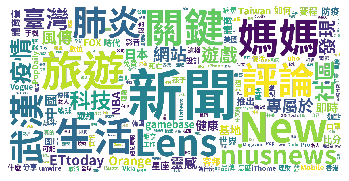

採用停用詞


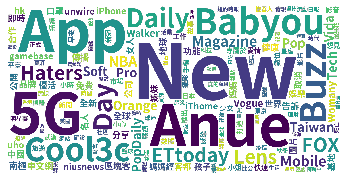

In [222]:
font_path = 'Data/SourceHanSansTW-Bold.otf'

# 未採用停用詞
print('未採用停用詞')
text = ' '.join(corpus_title)
cloud = WordCloud(font_path=font_path,
                  width=1500,
                  height=750,
                  min_font_size=10,
                  background_color=None,
                  mode='RGBA',
                  collocations=False,
                  margin=5
                 ).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

# 採用停用詞
print('採用停用詞')
text = ' '.join(word)
cloud = WordCloud(font_path=font_path,
                  width=1500,
                  height=750,
                  min_font_size=10,
                  background_color=None,
                  mode='RGBA',
                  collocations=False,
                  margin=5
                 ).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()